![](1.png)

![](2.png)

![](3.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
## loading the dataset

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
## let's check the shape of our data

data.shape


(7752, 25)

### From the above result using the shape() method we can see that our dataset have __7752 records(rows)__ and __25 attribute(columns)__

In [4]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


### From the above head() method we can see the first 5 records of our dataset.

In [5]:
print('@@'*50)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


## From the above problem statement we are asked to build a model which can predict the __Next_Tmax__ and __Next_Tmin__ . Since the outcome "Next_Tmax" and "Next_Tmin" have continous data we can assume that ,It is regression prblems.

In [6]:
print('@@'*50)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


### We can see that our dataset has only dtypes: "float64", and "object" and only the column "Date" has Dtype = object. we see also that most of columns have "Non-Null Count" less than 7752 even our targets variables.

In [8]:
data['Next_Tmax'].isna().sum()

27

In [9]:
data['Next_Tmin'].isna().sum()

27

### From the above verification when can see that have NAN values for our target variables so let's drop those records.

In [10]:
## Let's drop those records

data.dropna(subset = ["Next_Tmax"], inplace=True)

In [11]:
## verification

data['Next_Tmax'].isna().sum()

0

In [12]:
## verification

data['Next_Tmin'].isna().sum()

0

In [13]:
## Let's check for duplicated values
data.duplicated().sum()

0

### The above verification using duplicated() we can see that there no duplicated records in our dataset.

In [14]:
data.isna().sum()

station              2
Date                 2
Present_Tmax        60
Present_Tmin        60
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
dtype: int64

### From the above verification  using the isna() and sum() methods we can see that most of the columns of our dataset have mussing data.

In [15]:
# This will help us to see how is the shape of the data in each column.

for column in data.columns:
    print(data[column].value_counts())
    print('**'*20)

1.0     310
10.0    310
23.0    310
21.0    310
18.0    310
17.0    310
14.0    310
2.0     310
13.0    310
9.0     310
4.0     310
3.0     310
25.0    310
12.0    309
16.0    309
19.0    309
20.0    309
24.0    309
11.0    308
15.0    308
22.0    308
8.0     307
7.0     306
6.0     306
5.0     305
Name: station, dtype: int64
****************************************
30-06-2013    25
21-07-2015    25
18-07-2016    25
17-07-2016    25
16-07-2016    25
              ..
09-07-2017    24
11-08-2013    24
03-08-2013    24
31-07-2015    24
23-08-2017    23
Name: Date, Length: 310, dtype: int64
****************************************
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64
****************************************
24.0    161
23.8    153
23.1    143
23.5    143
23.3    140
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_

### From the above code and the outout we can say all the columns are important and not need to drop anyone of them now.

## Let's convert the colum "Date" into 'year','month' and 'day'

In [16]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day

In [17]:
data.head(2)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0


In [18]:
## let's drop column 'Date' now
data.drop(['Date'],axis=1,inplace=True)

In [19]:
data.shape

(7725, 27)

### Now we can see that how that our dataset have 7725 records and 27 columns.

In [20]:
## let's check the info of the dataset again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7725 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Present_Tmax      7665 non-null   float64
 2   Present_Tmin      7665 non-null   float64
 3   LDAPS_RHmin       7650 non-null   float64
 4   LDAPS_RHmax       7650 non-null   float64
 5   LDAPS_Tmax_lapse  7650 non-null   float64
 6   LDAPS_Tmin_lapse  7650 non-null   float64
 7   LDAPS_WS          7650 non-null   float64
 8   LDAPS_LH          7650 non-null   float64
 9   LDAPS_CC1         7650 non-null   float64
 10  LDAPS_CC2         7650 non-null   float64
 11  LDAPS_CC3         7650 non-null   float64
 12  LDAPS_CC4         7650 non-null   float64
 13  LDAPS_PPT1        7650 non-null   float64
 14  LDAPS_PPT2        7650 non-null   float64
 15  LDAPS_PPT3        7650 non-null   float64
 16  LDAPS_PPT4        7650 non-null   float64


### Great we see that our dataset have  now unique __Dtype__ = float64, so we can Imputing the NAN values with appropiate values.

## __Imputing__, I will used __SimpleImputer__ since there are lot of column which have missing values.

In [21]:
## importing the libraries


from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [22]:
data.isna().sum()

station              2
Present_Tmax        60
Present_Tmin        60
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
year                 2
month                2
day                  2
dtype: int64

### __First let's get all the columns containing NAN values__

In [23]:
##  let's get all the column which contain nan values.

## creating an empty list

columns_conatin_nan = []

for column in data.columns:
    if data[column].isna().sum()!=0:
        columns_conatin_nan.append(column)

In [24]:
columns_conatin_nan

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'year',
 'month',
 'day']

In [25]:
len(columns_conatin_nan)

20

### We can see that there are 20 columns containing NAN values

In [26]:
## instantiate the method

simp = SimpleImputer()

In [27]:
# Imputer ,It means Imputation ==> fill NAN     

ct = make_column_transformer(
(simp,columns_conatin_nan),   #This will fill the NaN in the columns the list columns_conatin_nan
remainder='drop')  # 'passthrogh' to keep all other columns 

In [28]:
transformed_data = ct.fit_transform(data)
        

In [29]:
transformed_data

array([[1.00000000e+00, 2.87000000e+01, 2.14000000e+01, ...,
        2.01300000e+03, 6.00000000e+00, 3.00000000e+01],
       [2.00000000e+00, 3.19000000e+01, 2.16000000e+01, ...,
        2.01300000e+03, 6.00000000e+00, 3.00000000e+01],
       [3.00000000e+00, 3.16000000e+01, 2.33000000e+01, ...,
        2.01300000e+03, 6.00000000e+00, 3.00000000e+01],
       ...,
       [2.50000000e+01, 2.32000000e+01, 1.74000000e+01, ...,
        2.01700000e+03, 8.00000000e+00, 3.00000000e+01],
       [1.30081575e+01, 2.00000000e+01, 1.13000000e+01, ...,
        2.01499741e+03, 7.07963227e+00, 1.63714878e+01],
       [1.30081575e+01, 3.76000000e+01, 2.99000000e+01, ...,
        2.01499741e+03, 7.07963227e+00, 1.63714878e+01]])

In [30]:
transformed_data.shape

(7725, 20)

## __Now let's update those 20 columns in the dataset  with their new values.__

In [31]:
## Updating the imputed data to repective columns

data['station'] = transformed_data[:,0]
data['Present_Tmax'] = transformed_data[:,1]
data['Present_Tmin'] = transformed_data[:,2]
data['LDAPS_RHmin'] = transformed_data[:,3]
data['LDAPS_RHmax'] = transformed_data[:,4]
data['LDAPS_Tmax_lapse'] = transformed_data[:,5]
data['LDAPS_Tmin_lapse'] = transformed_data[:,6]
data['LDAPS_WS'] = transformed_data[:,7]
data['LDAPS_LH'] = transformed_data[:,8]
data['LDAPS_CC1'] = transformed_data[:,9]
data['LDAPS_CC2'] = transformed_data[:,10]
data['LDAPS_CC3'] = transformed_data[:,11]
data['LDAPS_CC4'] = transformed_data[:,12]
data['LDAPS_PPT1'] = transformed_data[:,13]
data['LDAPS_PPT2'] = transformed_data[:,14]
data['LDAPS_PPT3'] = transformed_data[:,15]
data['LDAPS_PPT4'] = transformed_data[:,16]
data['year'] = transformed_data[:,17]
data['month'] = transformed_data[:,18]
data['day'] = transformed_data[:,19]

In [32]:
## verifiction

data.isna().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
year                0
month               0
day                 0
dtype: int64

In [33]:
data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7725 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7725 non-null   float64
 1   Present_Tmax      7725 non-null   float64
 2   Present_Tmin      7725 non-null   float64
 3   LDAPS_RHmin       7725 non-null   float64
 4   LDAPS_RHmax       7725 non-null   float64
 5   LDAPS_Tmax_lapse  7725 non-null   float64
 6   LDAPS_Tmin_lapse  7725 non-null   float64
 7   LDAPS_WS          7725 non-null   float64
 8   LDAPS_LH          7725 non-null   float64
 9   LDAPS_CC1         7725 non-null   float64
 10  LDAPS_CC2         7725 non-null   float64
 11  LDAPS_CC3         7725 non-null   float64
 12  LDAPS_CC4         7725 non-null   float64
 13  LDAPS_PPT1        7725 non-null   float64
 14  LDAPS_PPT2        7725 non-null   float64
 15  LDAPS_PPT3        7725 non-null   float64
 16  LDAPS_PPT4        7725 non-null   float64


### Great we can see that our dataset have now unique Dtype = float64 and all the columns have "Non-Null Count" = 7725. this mean there no more nan values great.

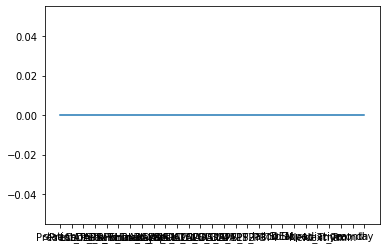

In [35]:
plt.plot(data.isna().sum())

### From the above graph we the confirmation that our dataset has no missing values since we the straight line with x_axis =0 and y_axis = 0.

In [36]:
pd.options.display.max_columns = None

data.describe()


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
count,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000
mean,13.008157,29.769563,23.224631,56.741402,88.369140,29.616253,23.511807,7.096739,62.468599,0.368482,0.355797,0.318133,0.299092,0.591684,0.484298,0.277121,0.269440,37.544755,126.991370,61.926856,1.258725,5342.066031,30.274887,22.932220,2014.997410,7.079632,16.371488
std,7.213100,2.959205,2.405561,14.583630,7.164028,2.932271,2.333987,2.171835,33.556339,0.261052,0.256664,0.248881,0.252962,1.936308,1.752597,1.152456,1.199982,0.050386,0.079347,54.331701,1.371331,429.235277,3.128010,2.487613,1.413662,2.238210,8.241242
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.700000,46.045017,84.291199,27.696185,22.114277,5.686496,37.452979,0.148229,0.142366,0.103199,0.082734,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.266701,89.699196,29.664030,23.733589,6.564141,57.299645,0.319678,0.315159,0.265058,0.232663,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5437.534180,30.500000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.900000,66.996681,93.704353,31.687106,25.135301,7.996899,83.897461,0.571547,0.554301,0.493721,0.497116,0.067148,0.024035,0.009649,0.000703,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


### From the above describe method we can see some statistical distrubution of the columns like the column "count", "mean", standard deviation ("std"), the min and max and also the quantiles.

## __Let's create a copy of the clean data before further processing.__

In [94]:
new_data = data.copy()

In [95]:
new_data.head(4)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0


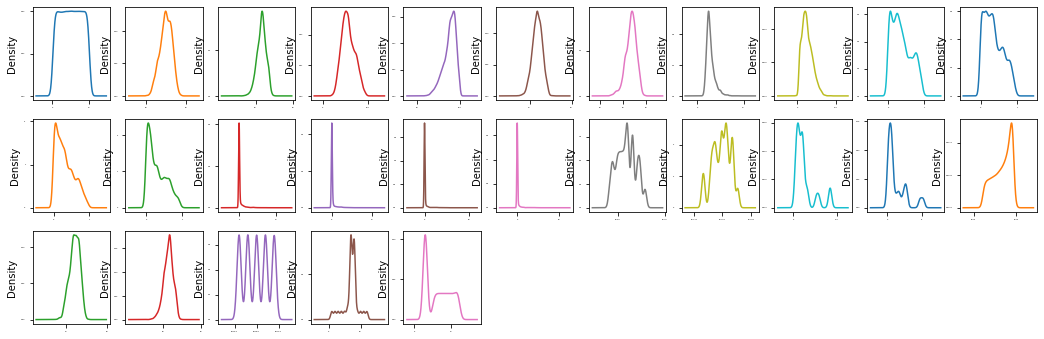

In [96]:
new_data.plot(kind='density',subplots=True,
          layout=(6,11),sharex=False,
          legend=False,fontsize='2',
          figsize =(18,12))
plt.show()

### From this density graph we can see that most the columns in the dataset have not normal distribution shape and this means the distribution of the data in each those columns are not much good.

In [97]:
## let's divide the dataset into portion while plotting

cols_A = new_data.iloc[:,:14]
cols_B = new_data.iloc[:,14:]

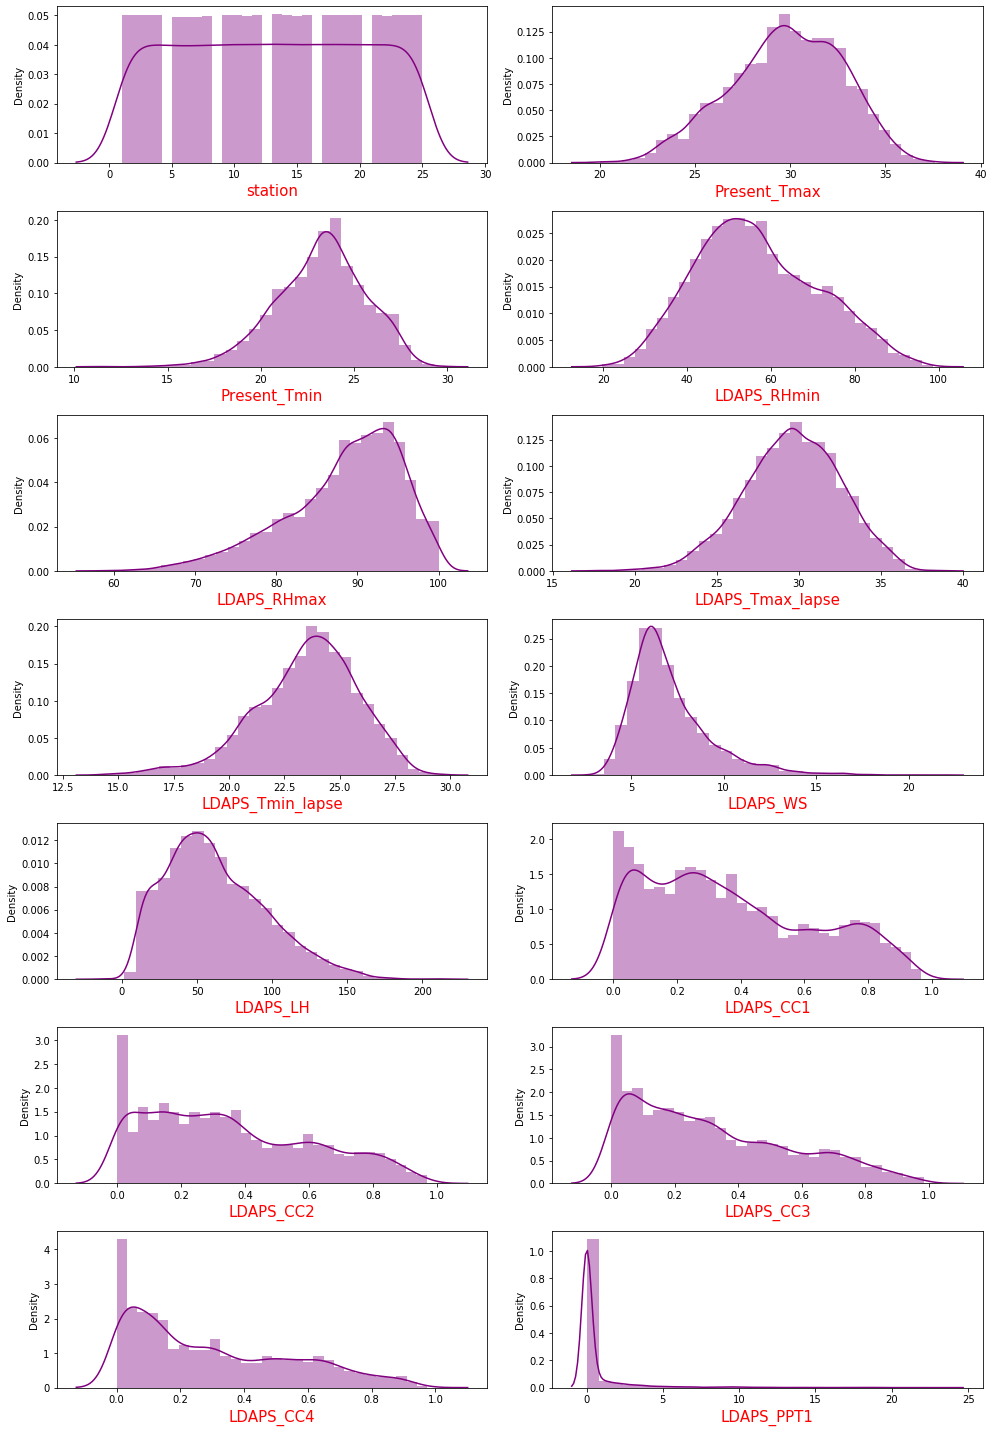

In [98]:
# plot a  distplot check the distribution

plt.figure(figsize=(14,20))
plotnumber = 1

for column in cols_A:
    if plotnumber <= 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(cols_A[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

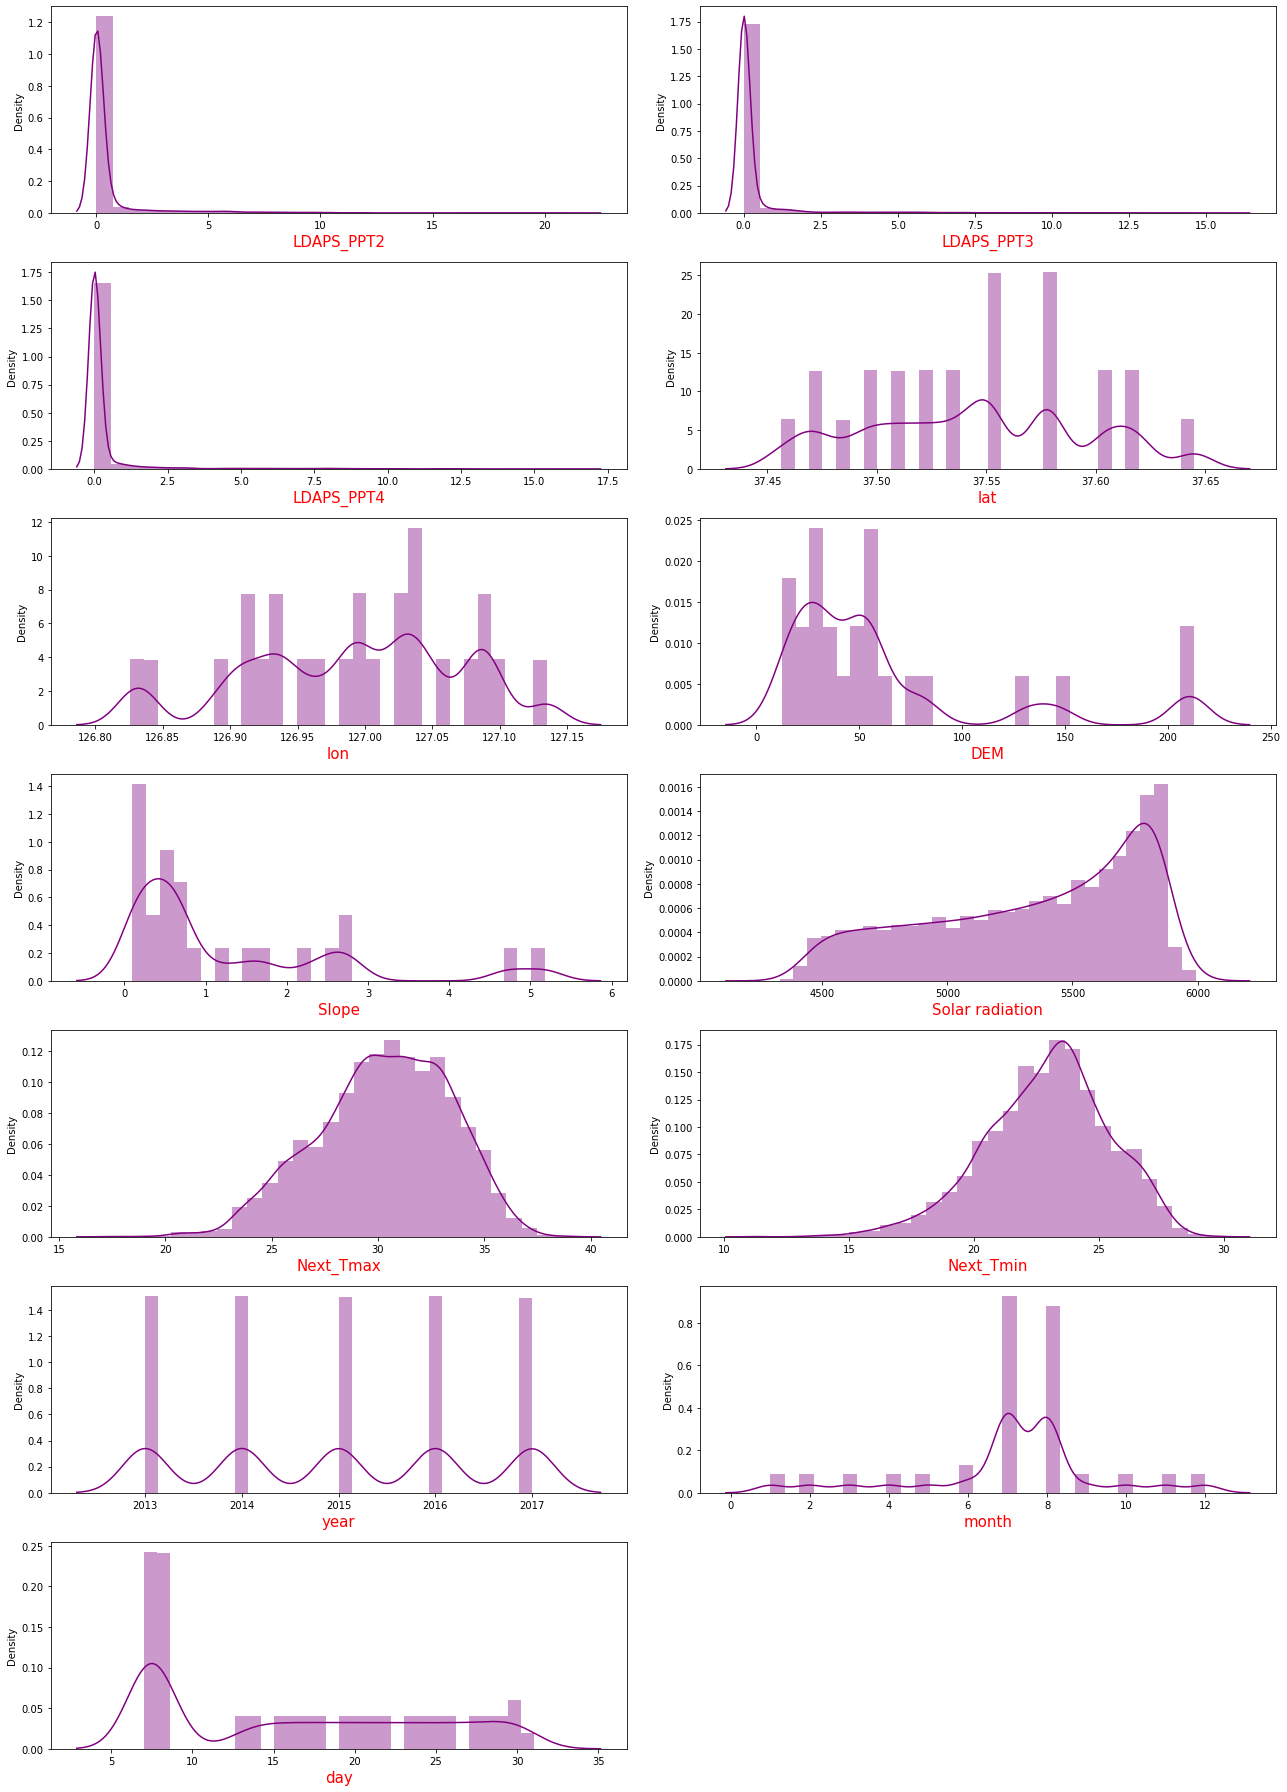

In [99]:
# plot a  distplot check the distribution

plt.figure(figsize=(18,25))
plotnumber = 1

for column in cols_B:
    if plotnumber <= 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(cols_B[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

### From distplot we can see that our data is not distributed normally for most of the columns since we can see a lot of skewness,so will try to remove them very soon.

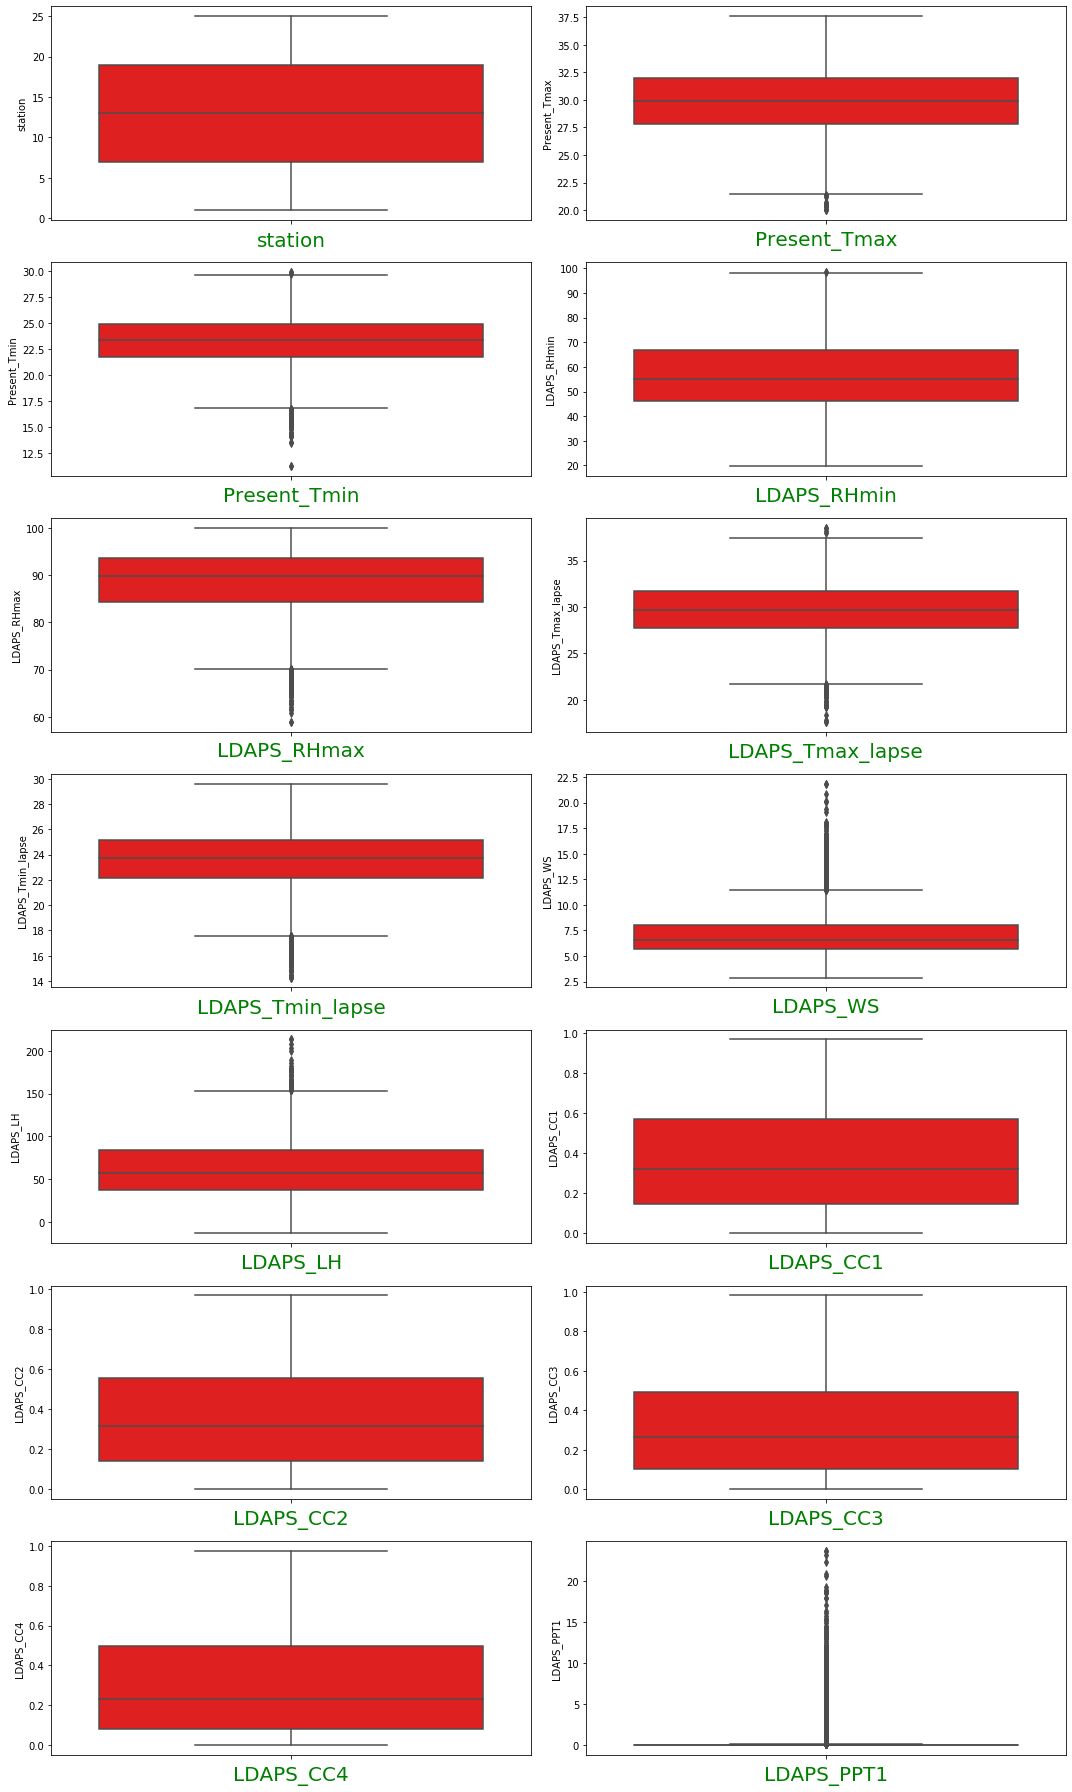

In [100]:
plt.figure(figsize=(15,25))
plotnumber = 1

for column in cols_A:
    if plotnumber <= 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(y= cols_A[column],color='red',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

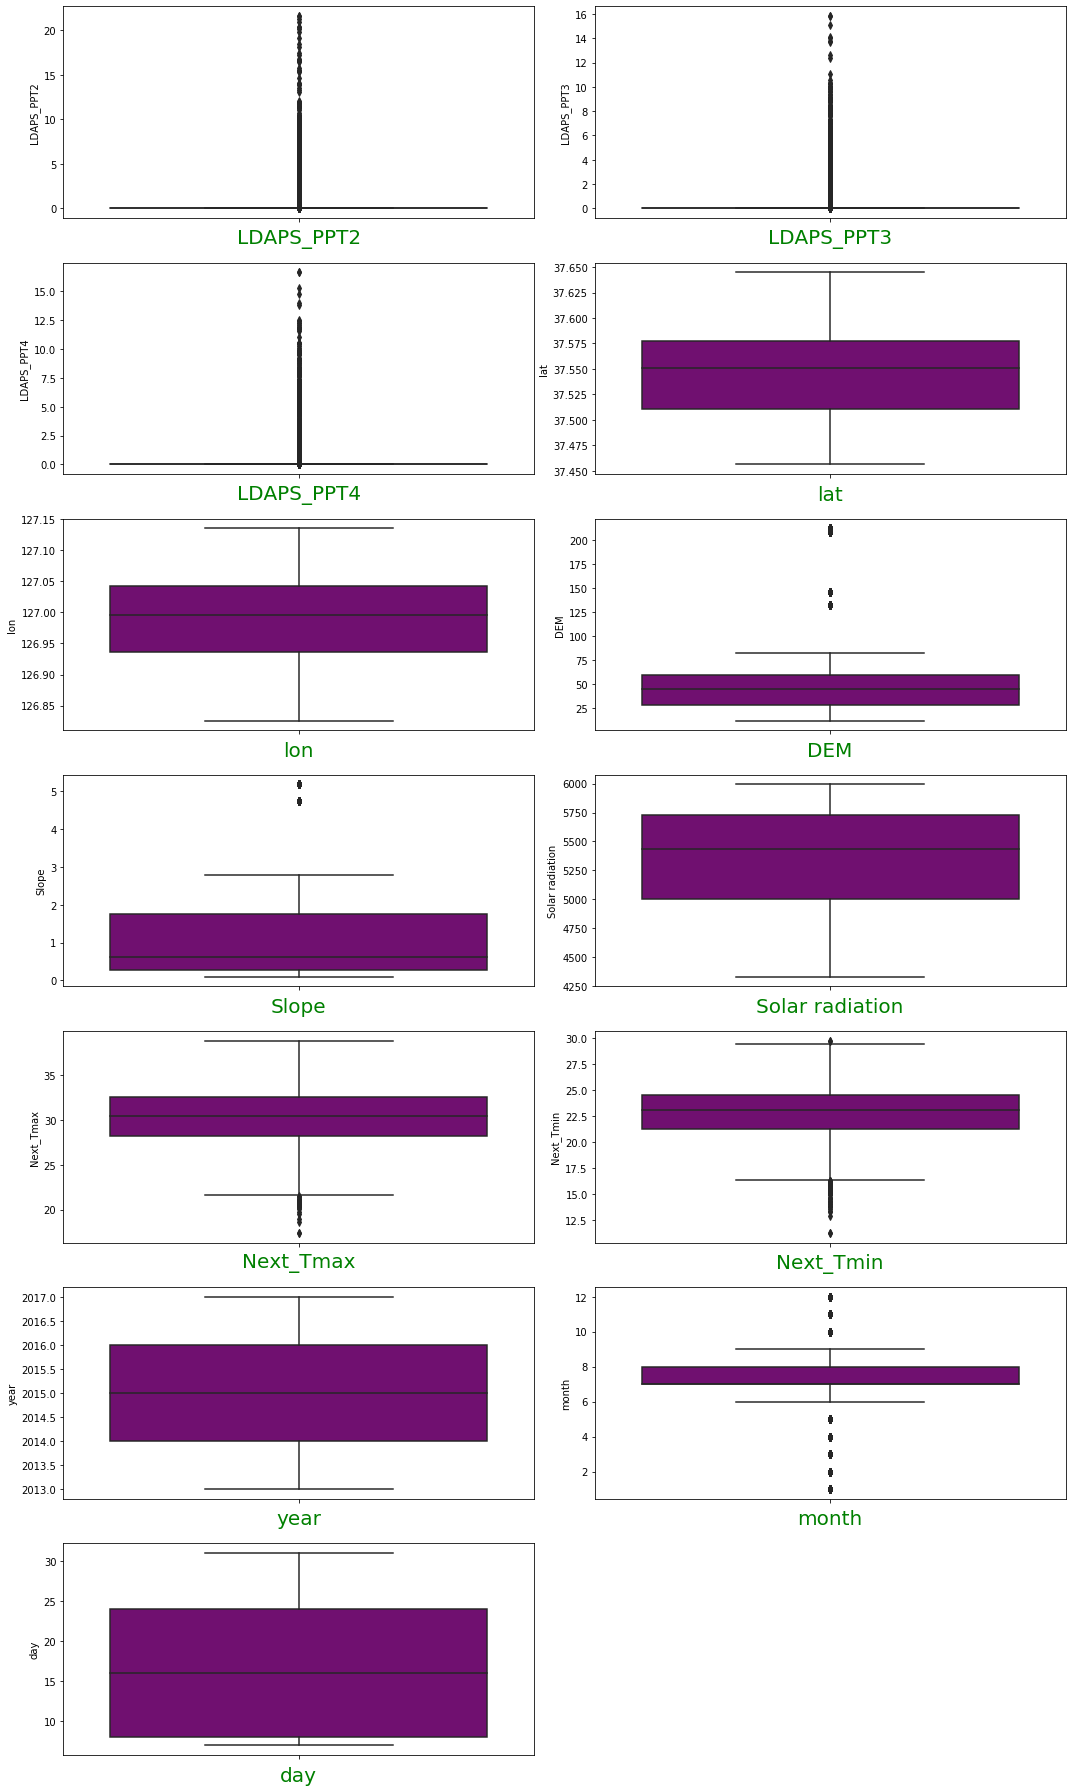

In [101]:
plt.figure(figsize=(15,25))
plotnumber = 1

for column in cols_B:
    if plotnumber <= 13:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(y= cols_B[column],color='purple',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

## From the above boxplot graphs we can see outliers in some columns,so we will remove the Outliers in those columns to make our data look better.

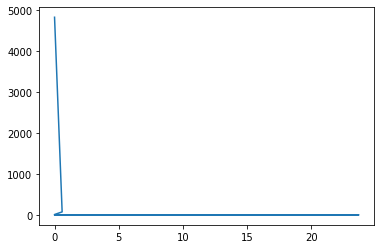

In [55]:
plt.plot(new_data['LDAPS_PPT1'].value_counts())

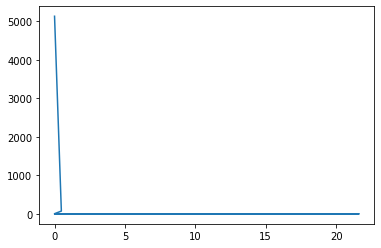

In [57]:
plt.plot(new_data['LDAPS_PPT2'].value_counts())

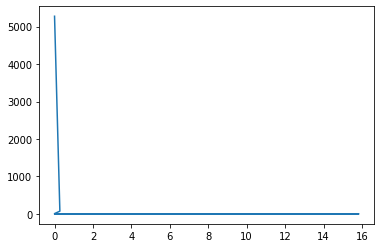

In [58]:
plt.plot(new_data['LDAPS_PPT3'].value_counts())

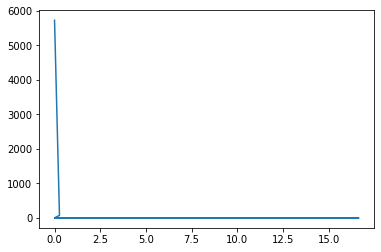

In [63]:
plt.plot(new_data['LDAPS_PPT4'].value_counts())

### Form the above plots we see that the 4 columns (LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4) have the same information so let's let's drop 3 of them. 

In [102]:
new_data.drop(['LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'],axis=1,inplace=True)

In [103]:
new_data.shape

(7725, 24)

### Now we can see that our new data has 7725 records and 25 rows.

## __Let's remove the Outliers from our dataset using the boxplot and Quantiles technique.__

### Outlier Dectection Formula
### Higher side ===> Q3 + (1.5 * IQR)
### lower side ===> Q1 - (1.5 * IQR)
### IQR = Inter Quantile Rate = Q3 - Q1

In [104]:
## Find the IQR ( Inter Quantile Range) to identify outlier

# 1st quantile
q1 = new_data.quantile(0.25)

# 3rd quantile
q3 = new_data.quantile(0.75)

#IQR 
iqr = q3 - q1

## __Removing Outliers from the higher side.__

In [105]:
high_LDAPS_WS = (q3.LDAPS_WS + (1.5 * iqr.LDAPS_WS))
high_LDAPS_WS

11.462504093500002

#### This means from the column "LDAPS_WS" all the records values greater than 11.4625 (LDAPS_WS> 11.4625) are Outliers.


In [106]:
## the get indexes of those records
indexes = np.where(new_data['LDAPS_WS'] >high_LDAPS_WS)
indexes

(array([  25,   27,   28,   29,   30,   31,   32,   33,   34,   35,   36,
          38,   39,   40,   42,   43,   44,   45,   46,   47,   48,   49,
          69,   94,  175,  181,  183,  194,  219,  244,  258,  259,  269,
         275,  284,  294,  325,  334,  344,  369,  375,  378,  381,  382,
         383,  384,  386,  388,  389,  393,  394,  397,  398,  399,  400,
         409,  419,  469,  475,  494,  500,  519,  525,  544,  550,  559,
         569,  575,  576,  577,  579,  580,  581,  582,  583,  584,  585,
         586,  587,  588,  589,  590,  591,  592,  593,  594,  595,  596,
         597,  598,  599,  843,  948,  967,  992, 1172, 1191, 1216, 1472,
        1480, 1481, 1491, 1616, 2091, 2097, 2116, 2166, 2172, 2173, 2174,
        2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185,
        2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196,
        2347, 2350, 2358, 2360, 2361, 2365, 2366, 2367, 2369, 2370, 2371,
        2372, 2375, 2378, 2379, 2380, 

In [107]:
## Let's drop indexes from the dataset

new_data= new_data.drop(new_data.index[indexes])

In [108]:
## reset the index
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.000000,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.00000,6.000000,30.000000
1,2.000000,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.00000,6.000000,30.000000
2,3.000000,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.00000,6.000000,30.000000
3,4.000000,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.00000,6.000000,30.000000
4,5.000000,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.00000,6.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7343,22.000000,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1,2017.00000,8.000000,30.000000
7344,23.000000,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.00000,8.000000,30.000000
7345,24.000000,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.00000,8.000000,30.000000
7346,25.000000,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.0,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.00000,8.000000,30.000000


In [109]:
## "LDAPS_PPT1",column

indexes = np.where(new_data["LDAPS_PPT1"] > (q3.LDAPS_PPT1 + (1.5 * iqr.LDAPS_PPT1)))

In [110]:
new_data= new_data.drop(new_data.index[indexes])


In [111]:
## reset the index
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.000000,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.00000,6.000000,30.000000
1,2.000000,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.00000,6.000000,30.000000
2,3.000000,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.00000,6.000000,30.000000
3,4.000000,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.00000,6.000000,30.000000
4,5.000000,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.00000,6.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,22.000000,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1,2017.00000,8.000000,30.000000
5877,23.000000,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.00000,8.000000,30.000000
5878,24.000000,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.00000,8.000000,30.000000
5879,25.000000,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.0,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.00000,8.000000,30.000000


In [112]:
## "LDAPS_LH",column

indexes = np.where(new_data["LDAPS_LH"] > (q3.LDAPS_LH + (1.5 * iqr.LDAPS_LH)))

In [113]:
new_data= new_data.drop(new_data.index[indexes])

In [114]:
## reset the index
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.000000,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.00000,6.000000,30.000000
1,2.000000,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.00000,6.000000,30.000000
2,3.000000,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.00000,6.000000,30.000000
3,4.000000,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.00000,6.000000,30.000000
4,5.000000,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.00000,6.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,22.000000,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1,2017.00000,8.000000,30.000000
5825,23.000000,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.00000,8.000000,30.000000
5826,24.000000,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.00000,8.000000,30.000000
5827,25.000000,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.0,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.00000,8.000000,30.000000


In [115]:
## "LDAPS_RHmin",column

indexes = np.where(new_data["LDAPS_RHmin"] > (q3.LDAPS_RHmin + (1.5 * iqr.LDAPS_RHmin)))

In [116]:
new_data= new_data.drop(new_data.index[indexes])

In [117]:
## reset the index
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.000000,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.00000,6.000000,30.000000
1,2.000000,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.00000,6.000000,30.000000
2,3.000000,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.00000,6.000000,30.000000
3,4.000000,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.00000,6.000000,30.000000
4,5.000000,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.00000,6.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,22.000000,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1,2017.00000,8.000000,30.000000
5825,23.000000,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.00000,8.000000,30.000000
5826,24.000000,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.00000,8.000000,30.000000
5827,25.000000,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.0,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.00000,8.000000,30.000000


In [118]:
## "Slope",column

indexes = np.where(new_data["Slope"] > (q3.Slope + (1.5 * iqr.Slope)))
new_data= new_data.drop(new_data.index[indexes])

In [119]:
## reset the index
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.000000,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.00000,6.000000,30.000000
1,2.000000,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.00000,6.000000,30.000000
2,3.000000,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.00000,6.000000,30.000000
3,4.000000,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.00000,6.000000,30.000000
4,5.000000,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.00000,6.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5391,22.000000,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1,2017.00000,8.000000,30.000000
5392,23.000000,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.00000,8.000000,30.000000
5393,24.000000,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.00000,8.000000,30.000000
5394,25.000000,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.0,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.00000,8.000000,30.000000


In [120]:
## "DEM",column

indexes = np.where(new_data["DEM"] > (q3.DEM + (1.5 * iqr.DEM)))
new_data= new_data.drop(new_data.index[indexes])

In [121]:
## reset the index
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,2.000000,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.00000,6.000000,30.000000
1,3.000000,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.00000,6.000000,30.000000
2,4.000000,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.00000,6.000000,30.000000
3,5.000000,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.00000,6.000000,30.000000
4,6.000000,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,2.328410e-01,0.146363,0.0,37.5102,127.042,54.6384,0.145700,5873.780762,31.5,24.0,2013.00000,6.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,22.000000,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1,2017.00000,8.000000,30.000000
4937,23.000000,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.00000,8.000000,30.000000
4938,24.000000,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.00000,8.000000,30.000000
4939,25.000000,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.0,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.00000,8.000000,30.000000


In [122]:
## "month",column

indexes = np.where(new_data["month"] > (q3.month + (1.5 * iqr.month)))
new_data= new_data.drop(new_data.index[indexes])

In [123]:
## reset the index
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,2.000000,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.00000,6.000000,30.000000
1,3.000000,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.00000,6.000000,30.000000
2,4.000000,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.00000,6.000000,30.000000
3,5.000000,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.00000,6.000000,30.000000
4,6.000000,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,2.328410e-01,0.146363,0.0,37.5102,127.042,54.6384,0.145700,5873.780762,31.5,24.0,2013.00000,6.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,22.000000,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1,2017.00000,8.000000,30.000000
4429,23.000000,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.00000,8.000000,30.000000
4430,24.000000,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.00000,8.000000,30.000000
4431,25.000000,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.0,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.00000,8.000000,30.000000


### __Now let's remove the Outliers from the Lower side__

In [125]:
##  "Present_Tmin",column

indexes = np.where(new_data["Present_Tmin"] < (q3.Present_Tmin - (1.5 * iqr.Present_Tmin)))
new_data= new_data.drop(new_data.index[indexes])

In [126]:
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,2.0,31.900000,21.600000,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
1,3.0,31.600000,23.300000,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
2,4.0,32.000000,23.400000,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
3,5.0,31.400000,21.900000,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0
4,6.0,31.900000,23.500000,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,21.0,26.500000,20.800000,53.808006,90.642967,26.826109,21.661609,6.956467,39.160437,0.524752,0.523850,0.811927,0.684941,0.0,37.5507,127.040,26.2980,0.5721,4573.437012,27.1,18.5,2017.0,8.0,27.0
4066,23.0,26.000000,20.900000,56.605389,91.945480,26.220300,20.138668,7.682873,67.804129,0.476038,0.505922,0.835418,0.616844,0.0,37.5372,126.891,15.5876,0.1554,4560.960938,28.2,18.1,2017.0,8.0,27.0
4067,24.0,26.700000,21.800000,54.296925,91.701218,26.593612,20.362916,7.713284,56.393407,0.482141,0.499822,0.838244,0.620466,0.0,37.5237,126.909,17.2956,0.2223,4556.236816,28.5,18.7,2017.0,8.0,27.0
4068,25.0,26.600000,20.700000,51.889240,88.492317,26.850981,21.182844,7.735349,37.386415,0.467923,0.516202,0.819804,0.632884,0.0,37.5237,126.970,19.5844,0.2713,4568.769043,28.5,18.5,2017.0,8.0,27.0


In [128]:
##  "Present_Tmax",column

indexes = np.where(new_data["Present_Tmax"] < (q3.Present_Tmax - (1.5 * iqr.Present_Tmax)))
new_data= new_data.drop(new_data.index[indexes])

In [129]:
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,2.0,31.900000,21.600000,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
1,3.0,31.600000,23.300000,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
2,4.0,32.000000,23.400000,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
3,5.0,31.400000,21.900000,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0
4,6.0,31.900000,23.500000,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3882,21.0,26.500000,20.800000,53.808006,90.642967,26.826109,21.661609,6.956467,39.160437,0.524752,0.523850,0.811927,0.684941,0.0,37.5507,127.040,26.2980,0.5721,4573.437012,27.1,18.5,2017.0,8.0,27.0
3883,23.0,26.000000,20.900000,56.605389,91.945480,26.220300,20.138668,7.682873,67.804129,0.476038,0.505922,0.835418,0.616844,0.0,37.5372,126.891,15.5876,0.1554,4560.960938,28.2,18.1,2017.0,8.0,27.0
3884,24.0,26.700000,21.800000,54.296925,91.701218,26.593612,20.362916,7.713284,56.393407,0.482141,0.499822,0.838244,0.620466,0.0,37.5237,126.909,17.2956,0.2223,4556.236816,28.5,18.7,2017.0,8.0,27.0
3885,25.0,26.600000,20.700000,51.889240,88.492317,26.850981,21.182844,7.735349,37.386415,0.467923,0.516202,0.819804,0.632884,0.0,37.5237,126.970,19.5844,0.2713,4568.769043,28.5,18.5,2017.0,8.0,27.0


In [131]:
##  "LDAPS_Tmax_lapse",column

indexes = np.where(new_data["LDAPS_Tmax_lapse"] < (q3.LDAPS_Tmax_lapse - (1.5 * iqr.LDAPS_Tmax_lapse)))
new_data= new_data.drop(new_data.index[indexes])

In [132]:
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
1,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
2,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
3,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0
4,6.0,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,15.0,25.9,20.2,50.495182,91.852829,26.754424,20.517850,7.983581,45.903082,0.478437,0.499066,0.821971,0.673671,0.0,37.5507,126.937,30.0464,0.8552,4587.453613,27.0,17.6,2017.0,8.0,27.0
3757,21.0,26.5,20.8,53.808006,90.642967,26.826109,21.661609,6.956467,39.160437,0.524752,0.523850,0.811927,0.684941,0.0,37.5507,127.040,26.2980,0.5721,4573.437012,27.1,18.5,2017.0,8.0,27.0
3758,23.0,26.0,20.9,56.605389,91.945480,26.220300,20.138668,7.682873,67.804129,0.476038,0.505922,0.835418,0.616844,0.0,37.5372,126.891,15.5876,0.1554,4560.960938,28.2,18.1,2017.0,8.0,27.0
3759,24.0,26.7,21.8,54.296925,91.701218,26.593612,20.362916,7.713284,56.393407,0.482141,0.499822,0.838244,0.620466,0.0,37.5237,126.909,17.2956,0.2223,4556.236816,28.5,18.7,2017.0,8.0,27.0


In [134]:
##  "LDAPS_Tmin_lapse",column

indexes = np.where(new_data["LDAPS_Tmin_lapse"] < (q3.LDAPS_Tmin_lapse - (1.5 * iqr.LDAPS_Tmin_lapse)))
new_data= new_data.drop(new_data.index[indexes])

In [135]:
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
1,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
2,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
3,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0
4,6.0,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3590,24.0,31.4,23.3,32.877285,77.249176,28.504894,21.282736,6.386594,59.798344,0.000000,0.000779,0.062782,0.047715,0.0,37.5237,126.909,17.2956,0.2223,4632.573730,30.3,21.2,2017.0,8.0,25.0
3591,25.0,31.8,23.2,21.529964,72.820923,29.578707,21.466330,6.682378,10.870162,0.000000,0.002961,0.060577,0.046143,0.0,37.5237,126.970,19.5844,0.2713,4644.800781,29.7,20.0,2017.0,8.0,25.0
3592,14.0,25.8,20.8,49.787209,90.899765,26.801016,20.702398,7.787976,41.073890,0.483112,0.514917,0.833875,0.598517,0.0,37.4967,126.927,30.9680,0.6180,4563.606934,27.1,18.0,2017.0,8.0,27.0
3593,21.0,26.5,20.8,53.808006,90.642967,26.826109,21.661609,6.956467,39.160437,0.524752,0.523850,0.811927,0.684941,0.0,37.5507,127.040,26.2980,0.5721,4573.437012,27.1,18.5,2017.0,8.0,27.0


In [136]:
##  "Next_Tmax",column

indexes = np.where(new_data["Next_Tmax"] < (q3.Next_Tmax - (1.5 * iqr.Next_Tmax)))
new_data= new_data.drop(new_data.index[indexes])

In [137]:
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
1,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
2,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
3,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0
4,6.0,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,24.0,31.4,23.3,32.877285,77.249176,28.504894,21.282736,6.386594,59.798344,0.000000,0.000779,0.062782,0.047715,0.0,37.5237,126.909,17.2956,0.2223,4632.573730,30.3,21.2,2017.0,8.0,25.0
3544,25.0,31.8,23.2,21.529964,72.820923,29.578707,21.466330,6.682378,10.870162,0.000000,0.002961,0.060577,0.046143,0.0,37.5237,126.970,19.5844,0.2713,4644.800781,29.7,20.0,2017.0,8.0,25.0
3545,14.0,25.8,20.8,49.787209,90.899765,26.801016,20.702398,7.787976,41.073890,0.483112,0.514917,0.833875,0.598517,0.0,37.4967,126.927,30.9680,0.6180,4563.606934,27.1,18.0,2017.0,8.0,27.0
3546,21.0,26.5,20.8,53.808006,90.642967,26.826109,21.661609,6.956467,39.160437,0.524752,0.523850,0.811927,0.684941,0.0,37.5507,127.040,26.2980,0.5721,4573.437012,27.1,18.5,2017.0,8.0,27.0


In [139]:
##  "Next_Tmin",column

indexes = np.where(new_data["Next_Tmin"] < (q3.Next_Tmin - (1.5 * iqr.Next_Tmin)))
new_data= new_data.drop(new_data.index[indexes])

In [140]:
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
1,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
2,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
3,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0
4,6.0,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,8.0,32.4,23.3,31.038910,80.540092,28.247256,20.781450,6.015960,68.758899,0.000000,0.008237,0.058696,0.046974,0.0,37.4697,126.910,52.5180,1.5629,4634.482910,30.1,20.7,2017.0,8.0,25.0
3499,21.0,32.0,23.2,24.531143,73.795036,29.822387,20.913117,6.596731,13.106829,0.000000,0.001257,0.058017,0.046164,0.0,37.5507,127.040,26.2980,0.5721,4649.458496,29.3,20.6,2017.0,8.0,25.0
3500,23.0,31.8,22.7,37.152740,81.297539,28.080520,20.827156,6.215447,91.005579,0.000000,0.000000,0.066037,0.049047,0.0,37.5372,126.891,15.5876,0.1554,4637.148926,30.6,20.1,2017.0,8.0,25.0
3501,24.0,31.4,23.3,32.877285,77.249176,28.504894,21.282736,6.386594,59.798344,0.000000,0.000779,0.062782,0.047715,0.0,37.5237,126.909,17.2956,0.2223,4632.573730,30.3,21.2,2017.0,8.0,25.0


In [142]:
##  "month",column

indexes = np.where(new_data["month"] < (q3.month - (1.5 * iqr.month)))
new_data= new_data.drop(new_data.index[indexes])

In [143]:
new_data.reset_index(drop=True)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,3.0,28.5,23.0,73.757042,88.580093,28.415396,25.325981,10.089882,27.235476,0.660188,0.780119,0.663286,0.546318,0.012890,37.5776,127.058,33.3068,0.2661,5813.828125,26.4,22.1,2013.0,7.0,7.0
1,4.0,28.7,22.6,87.535263,98.125633,27.193201,24.297690,11.247730,40.640605,0.667373,0.692811,0.636326,0.525666,0.011935,37.6450,127.022,45.7160,2.5348,5807.132324,26.6,22.5,2013.0,7.0,7.0
2,5.0,30.8,21.8,78.544052,94.253891,28.166002,24.610401,10.323574,57.451605,0.589464,0.739008,0.591915,0.576905,0.052525,37.5507,127.135,35.0380,0.5055,5809.353027,26.6,23.2,2013.0,7.0,7.0
3,6.0,28.1,22.8,75.090248,89.274826,28.172758,25.101520,9.879203,44.693631,0.686465,0.729394,0.618184,0.527017,0.041570,37.5102,127.042,54.6384,0.1457,5823.571289,27.6,23.2,2013.0,7.0,7.0
4,8.0,28.1,22.3,76.784866,90.487869,27.696185,24.428058,11.333446,29.615961,0.698625,0.805543,0.697573,0.607892,0.029441,37.4697,126.910,52.5180,1.5629,5813.237305,26.4,23.0,2013.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,8.0,32.4,23.3,31.038910,80.540092,28.247256,20.781450,6.015960,68.758899,0.000000,0.008237,0.058696,0.046974,0.000000,37.4697,126.910,52.5180,1.5629,4634.482910,30.1,20.7,2017.0,8.0,25.0
2658,21.0,32.0,23.2,24.531143,73.795036,29.822387,20.913117,6.596731,13.106829,0.000000,0.001257,0.058017,0.046164,0.000000,37.5507,127.040,26.2980,0.5721,4649.458496,29.3,20.6,2017.0,8.0,25.0
2659,23.0,31.8,22.7,37.152740,81.297539,28.080520,20.827156,6.215447,91.005579,0.000000,0.000000,0.066037,0.049047,0.000000,37.5372,126.891,15.5876,0.1554,4637.148926,30.6,20.1,2017.0,8.0,25.0
2660,24.0,31.4,23.3,32.877285,77.249176,28.504894,21.282736,6.386594,59.798344,0.000000,0.000779,0.062782,0.047715,0.000000,37.5237,126.909,17.2956,0.2223,4632.573730,30.3,21.2,2017.0,8.0,25.0


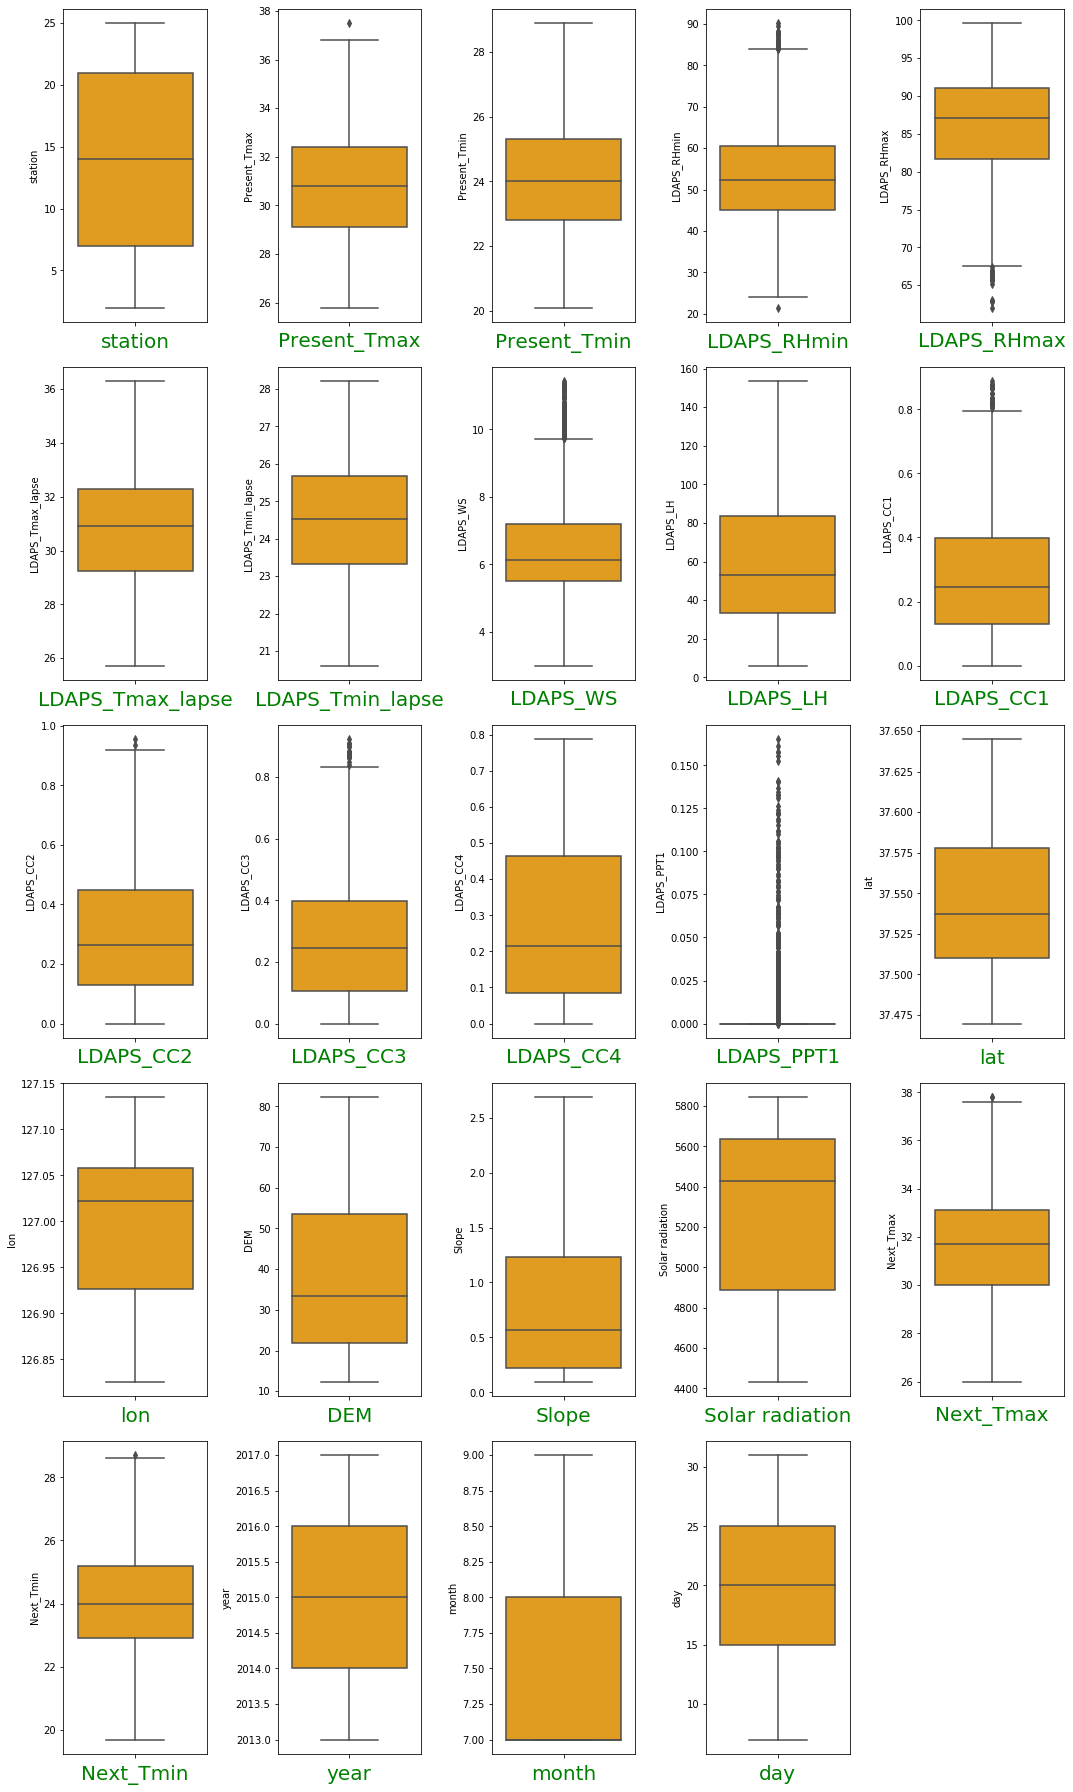

In [145]:
plt.figure(figsize=(15,25))
plotnumber = 1

for column in new_data:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.boxplot(y= new_data[column],color='orange',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

### From the boxplot here we can say that our data look better than before after removing the previous outliers. Great.

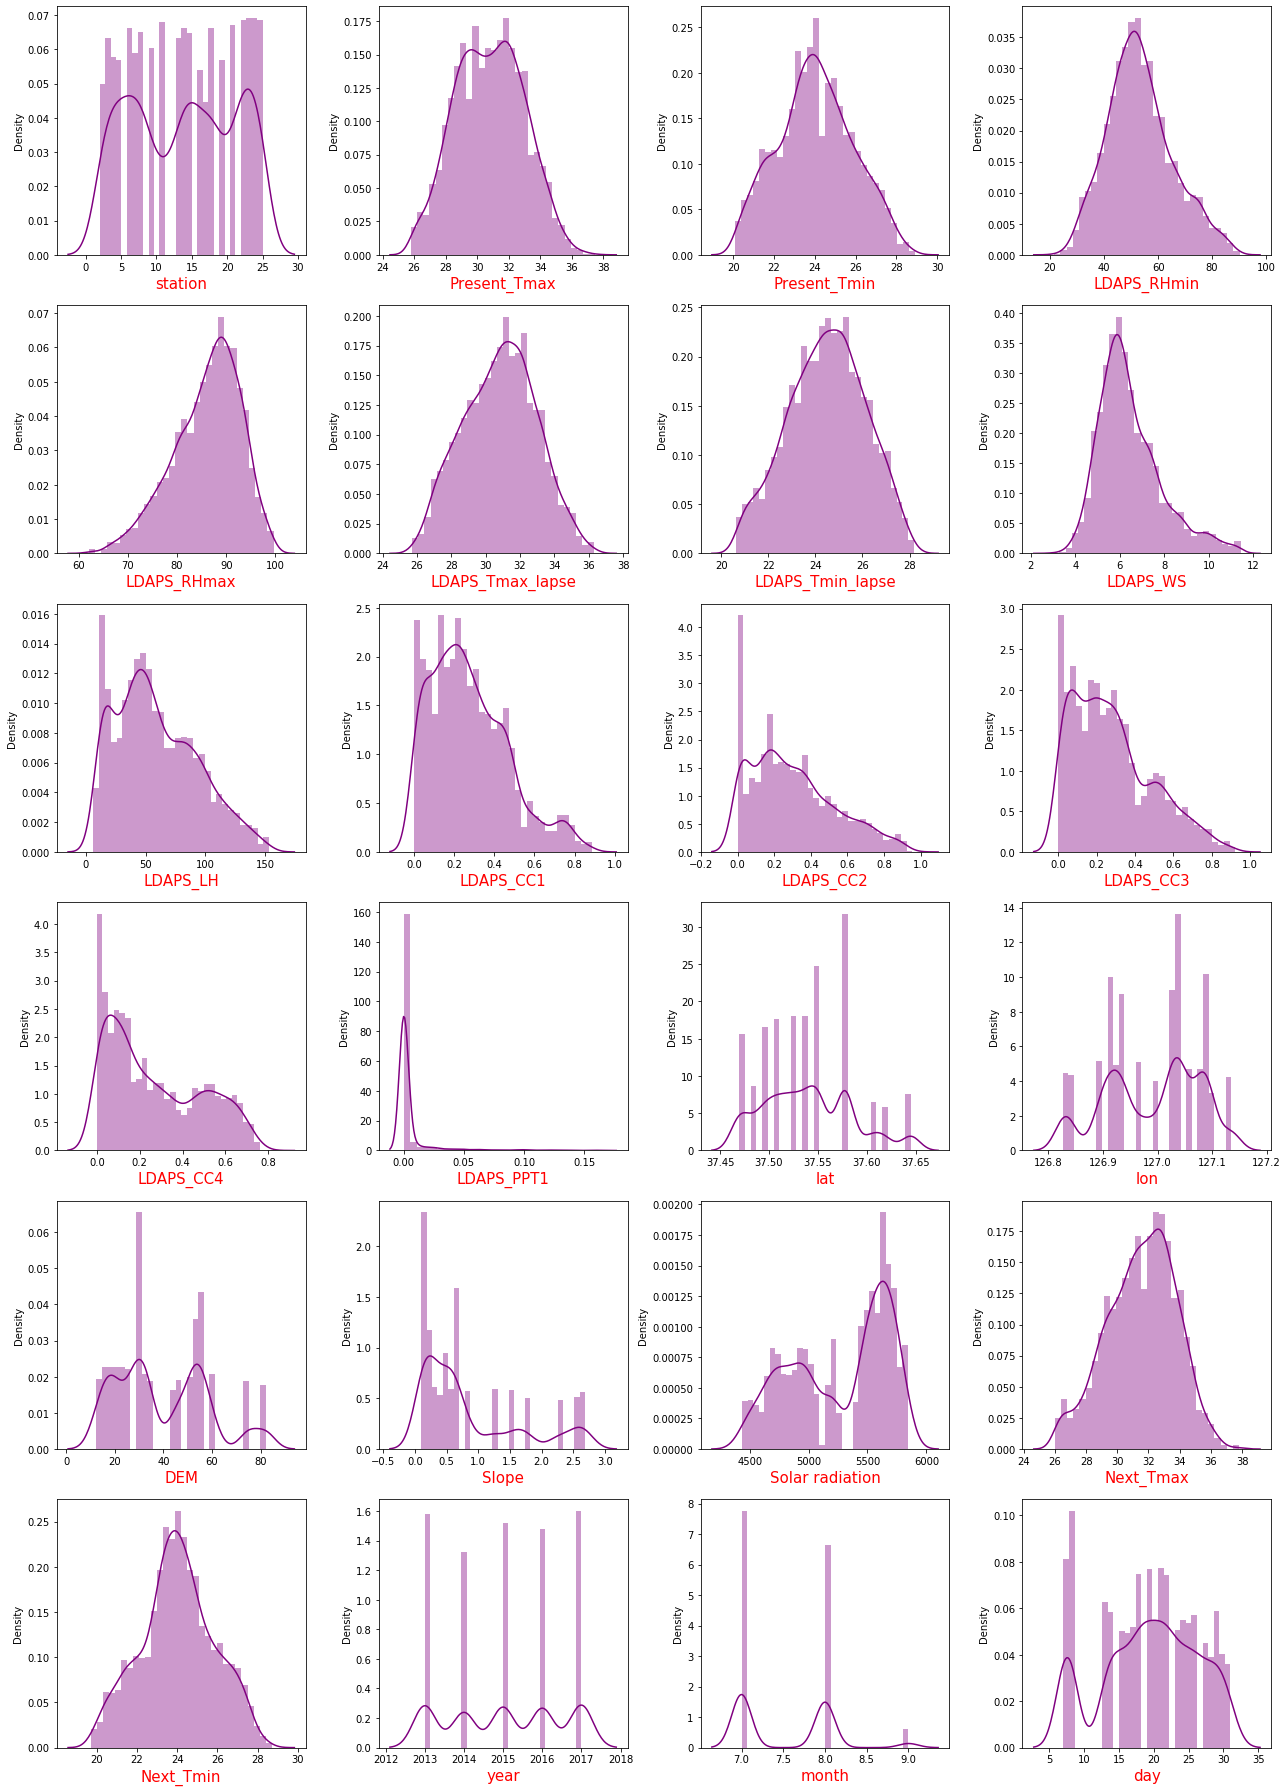

In [146]:
# plot a  distplot check the distribution

plt.figure(figsize=(18,25))
plotnumber = 1

for column in new_data:
    if plotnumber <= 24:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(new_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

### we can see that we have still some skewness in our dataset so let's remove them. before building the models.

## __I will remove sknewness from features columns..__

In [149]:
## importing the libraries
from sklearn.preprocessing import PowerTransformer

In [150]:
pt=PowerTransformer(method='yeo-johnson')

In [151]:
features = new_data.drop(['Next_Tmax','Next_Tmin'],axis=1)

In [152]:
features.shape

(2662, 22)

In [153]:
X_power=pt.fit_transform(features)

In [154]:
X_power

array([[-1.58833295, -1.06757628, -0.55797217, ..., -1.39654333,
        -0.94995128, -1.74680558],
       [-1.40141701, -0.97285413, -0.77993572, ..., -1.39654333,
        -0.94995128, -1.74680558],
       [-1.22491267,  0.01029975, -1.22943023, ..., -1.39654333,
        -0.94995128, -1.74680558],
       ...,
       [ 1.22354206,  0.47146494, -0.72427414, ...,  1.38528767,
         0.93958381,  0.81148039],
       [ 1.33890116,  0.28752114, -0.39267962, ...,  1.38528767,
         0.93958381,  0.81148039],
       [ 1.45295515,  0.47146494, -0.44766613, ...,  1.38528767,
         0.93958381,  0.81148039]])

In [155]:
## Now creating new dataset with new data without skew.

df=pd.DataFrame(X_power,columns=features.columns)


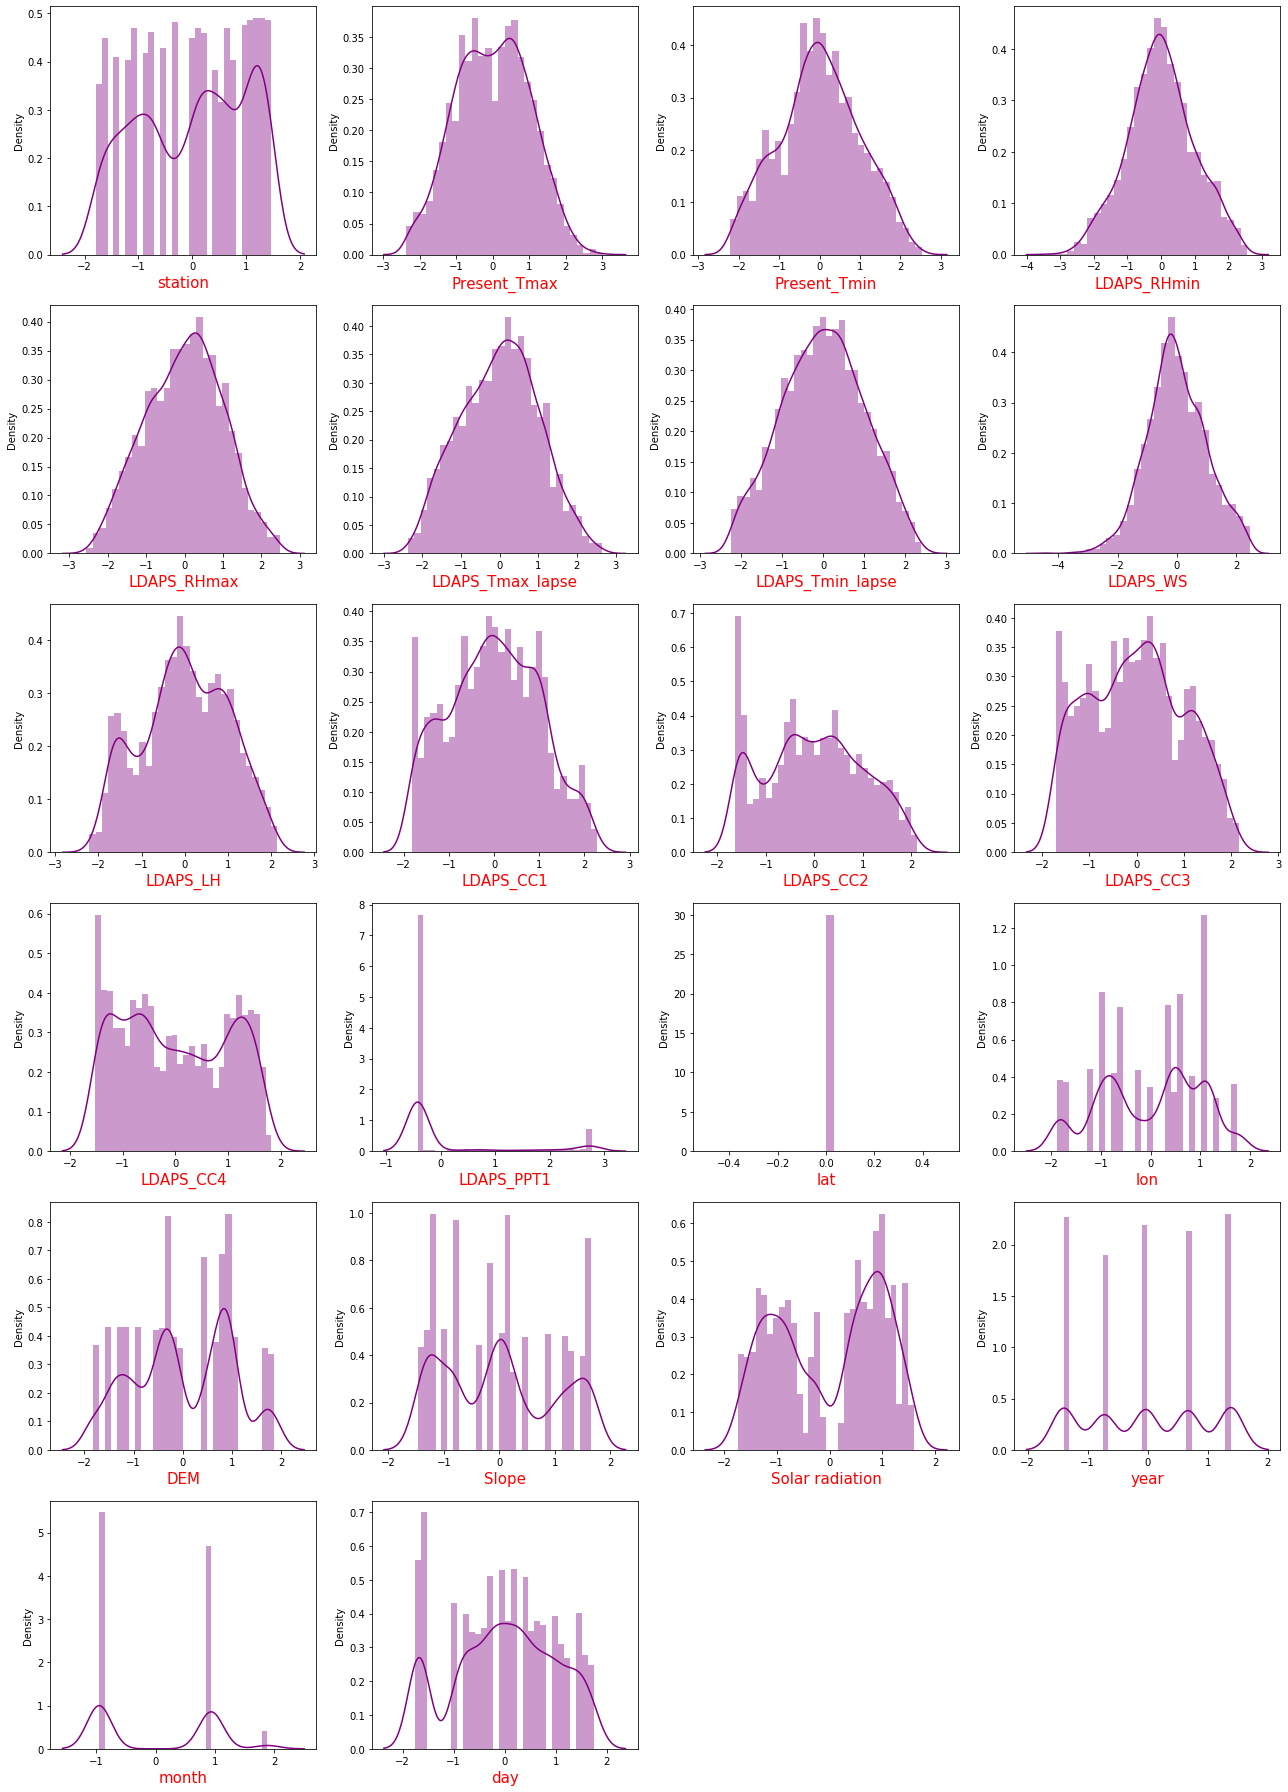

In [156]:
# plot a  distplot check the distribution

plt.figure(figsize=(18,25))
plotnumber = 1

for column in df:
    if plotnumber <= 22:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

### From here we can see that our data look better than before, and it has no kewness anymore.

In [157]:
print("*"*50)
print("*"*50)

**************************************************
**************************************************


In [159]:
df.lat.unique()

array([0.])

### From the above verification we see that the feature "lat" has 0 values for every records so let's drop it.

In [160]:
## Droping the lat attribute

df.drop('lat',axis=1,inplace=True)

## Now let's build some models to predict the Label: __Next_Tmax__

### Before fit our data to the model ,let's see by visualize the relationship between the features and the label "Next_Tmax" usig scatter method.

In [163]:
y1 = new_data.Next_Tmax

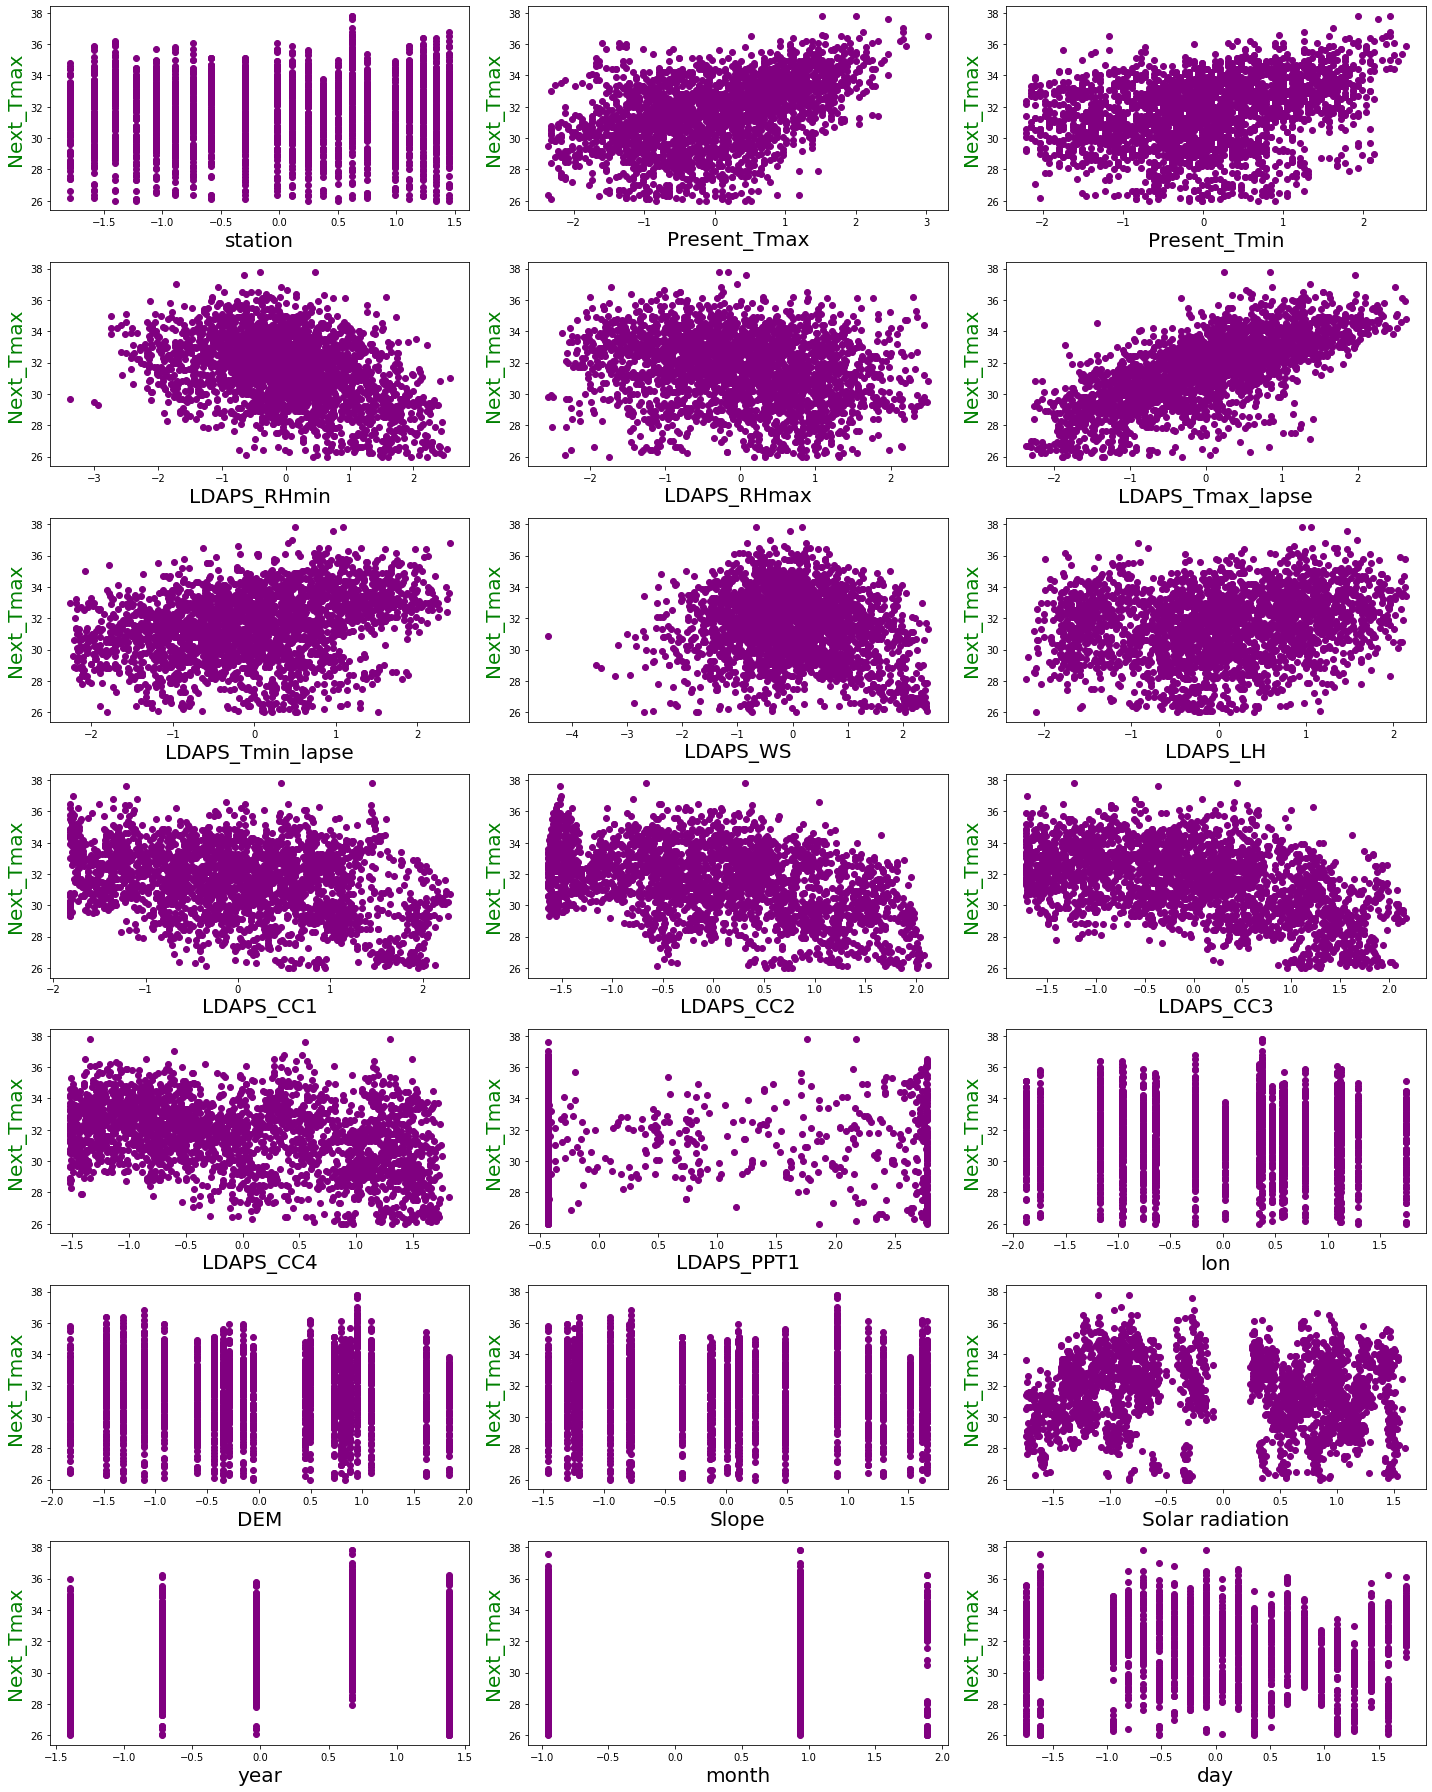

In [165]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 21:
        ax = plt.subplot(7,3,plotnumber)
        plt.scatter(df[column],y1, color ='purple')
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Next_Tmax', fontsize = 20,color='green' )
        
    plotnumber+=1
plt.tight_layout()

### From the above Scatter plot we can see that there great linear relationship between our features and the label Next_Tmax but not much stronger relationship. There we can say our above assumption is satisfied, it is a Regression problem.

In [166]:
## Importing the libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

In [167]:
## Features standarization

scale = StandardScaler()

X_scaled = scale.fit_transform(df)

In [183]:
##  let's build the model with this random state

x_train, x_test, y_train,y_test = train_test_split(X_scaled,y1,
                                                    test_size=30,
                                                    random_state=100)

Lr = LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [184]:
y_lr_pred = Lr.predict(x_test)

In [185]:
print('*****Accuracy ****\n')
print(metrics.r2_score(y_test,y_lr_pred))

*****Accuracy ****

0.7777939819858226


In [186]:
### let's check the mean_absolute_error

MAE = mean_absolute_error(y_test,y_lr_pred)
print(MAE)

0.8552535707450019


In [187]:
## Models evaluation using Mean Square Error (MSE)

print('\nThe Mean Square Erro of LinearRegression model is:',mean_squared_error(y_test,y_lr_pred))


The Mean Square Erro of LinearRegression model is: 1.0012208138797922


### __The Accuracy 0.77% is not bad and also the errors size is not  too much ,so let's build more models see which one fit better for our dataset.__

In [188]:
### instantiate the models

dtr = DecisionTreeRegressor(random_state=100)
ada = AdaBoostRegressor(random_state=100)
rid = Ridge(random_state=100)
las = Lasso(random_state=100)
rfr = RandomForestRegressor(random_state=100)

In [189]:
dtr.fit(x_train,y_train)
ada.fit(x_train,y_train)
rid.fit(x_train,y_train)
las.fit(x_train,y_train)
rfr.fit(x_train,y_train)
print('Models are accessfully fitted.!!!')

Models are accessfully fitted.!!!


In [190]:
dt_ypred = dtr.predict(x_test)
ada_ypred = ada.predict(x_test)
rid_ypred = rid.predict(x_test)
las_ypred = las.predict(x_test)
rfr_pred = rfr.predict(x_test)
print('Models are accessfully predicted.!!!')

Models are accessfully predicted.!!!


## __Models Evaluation__

In [191]:
## Models evaluation using Mean Absolute Erro

dt_mae  = mean_absolute_error(y_test,dt_ypred)
ada_mae = mean_absolute_error(y_test,ada_ypred)
rid_mae = mean_absolute_error(y_test,rid_ypred)
las_mae = mean_absolute_error(y_test,las_ypred)
rfr_mae = mean_absolute_error(y_test,rfr_pred)

print('\n','-'*50)
print('\nThe Mean Absolute Erro of DecisionTreeRegressor model is:',dt_mae )
print('\n','-'*50)
print('\nThe Mean Absolute Erro of AdaBoostRegressor model is:',ada_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of Ridge model is:',rid_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of Lasso model is:',las_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of RandomForestRegressor model is:',rfr_mae)


 --------------------------------------------------

The Mean Absolute Erro of DecisionTreeRegressor model is: 0.9233333333333331

 --------------------------------------------------

The Mean Absolute Erro of AdaBoostRegressor model is: 1.027052858843127

 --------------------------------------------------

The Mean Absolute Erro of Ridge model is: 0.8552456516369458

 --------------------------------------------------

The Mean Absolute Erro of Lasso model is: 1.3728045702952192

 --------------------------------------------------

The Mean Absolute Erro of RandomForestRegressor model is: 0.6228333333333329


## __From the above verification we can see that RandomForestRegressor model :MAE =0.6228  fit better our dataset__

In [192]:
## Models evaluation using Mean Square Error (MSE)

print('\nThe Mean Square Erro of DecisionTreeRegressor model is:',mean_squared_error(y_test,dt_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of AdaBoostRegressor model is:',mean_squared_error(y_test,ada_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of Ridge model is:',mean_squared_error(y_test,rid_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of Lasso model is:',mean_squared_error(y_test,las_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of RandomForestRegressor model is:',mean_squared_error(y_test,rfr_pred))


The Mean Square Erro of DecisionTreeRegressor model is: 1.1496666666666662

 --------------------------------------------------

The Mean Square Erro of AdaBoostRegressor model is: 1.5157808672869963

 --------------------------------------------------

The Mean Square Erro of Ridge model is: 1.0013531394107538

 --------------------------------------------------

The Mean Square Erro of Lasso model is: 3.0647773168512633

 --------------------------------------------------

The Mean Square Erro of RandomForestRegressor model is: 0.5620063666666657


### __From the above verification we can see that RandomForestRegressor model :MSE =0.5620 and RandomForestRegressor model MAE =0.6228 fit better our data__

In [193]:
### checking the accuray of each models.

print('*****Accuracy of DecisionTreeRegressor model is: ****\n')
print(metrics.r2_score(y_test,dt_ypred))
print('\n','-'*50)
print('*****Accuracy of AdaBoostRegressor model is: ****\n')
print(metrics.r2_score(y_test,ada_ypred))
print('\n','-'*50)
print('*****Accuracy of Ridge model is: ****\n')
print(metrics.r2_score(y_test,rid_ypred))
print('\n','-'*50)
print('*****Accuracy of Lasso model is: ****\n')
print(metrics.r2_score(y_test,las_ypred))
print('\n','-'*50)
print('*****Accuracy of RandomForestRegressor model is: ****\n')
print(metrics.r2_score(y_test,rfr_pred))
print('\n','-'*50)

*****Accuracy of DecisionTreeRegressor model is: ****

0.7448486402777643

 --------------------------------------------------
*****Accuracy of AdaBoostRegressor model is: ****

0.663595057121577

 --------------------------------------------------
*****Accuracy of Ridge model is: ****

0.7777646143089736

 --------------------------------------------------
*****Accuracy of Lasso model is: ****

0.31981841144639134

 --------------------------------------------------
*****Accuracy of RandomForestRegressor model is: ****

0.8752710739684954

 --------------------------------------------------


## __From all verification , we can conclude that RandomForestRegressor(rfr) model is our best model since it has the less errors(MAE, MSE) and also has the higest accuracy = r2_score = 87%__

Text(0.5, 1.0, 'Actual VS Predicted')

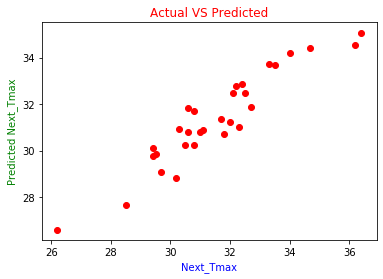

In [194]:
### let's plot the actual value and the predicted values and check how it look

plt.scatter(y_test,rfr_pred,color ='red')
plt.xlabel('Next_Tmax',color='blue')
plt.ylabel('Predicted Next_Tmax',color='green')
plt.title('Actual VS Predicted',color='r')

### __From above scatter plot we can say that our best model draw a great linear relationshipe with the dataset__

## __Hyper parameter Tuning (HPT)__

In [198]:
### importing the libraries
from sklearn.model_selection import GridSearchCV

In [199]:
grid_param1 = {
    'criterion':['mse', 'mae'],
    'max_depth':range(2,10,3),
    'min_samples_leaf':range(1,10,2),
    'min_samples_split':range(2,10,2),
    'max_features':["auto", "sqrt", "log2"]
    }

In [200]:
grid_search1 = GridSearchCV(estimator=rfr,
                         param_grid=grid_param1,
                         cv=5,n_jobs=-1)

In [201]:
## again train the model

grid_search1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=100), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 10, 3),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [202]:
# best parameters

best_parameters = grid_search1.best_params_
print(best_parameters)

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


### __Now we got the best paramters__

In [203]:
## so let's build again the decisionTreeRegressor model

rfr_model = RandomForestRegressor(criterion='mse',
                            max_depth=8,
                            max_features= 'auto',
                            min_samples_leaf=1,
                            min_samples_split=2,random_state=100)

In [204]:
## let's fit gain the model with the data

rfr_model.fit(x_train,y_train)
pred_drfr = rfr_model.predict(x_test)

print("\n=============Test Result==============")

print(f"Post Accuracy :{metrics.r2_score(y_test,pred_drfr)*100:.2f}%")
print("_____________________________________________")


=============Test Result==============
Post Accuracy :84.29%
_____________________________________________


### Here we are not getting good a Accuracy than 87% after parameter Turning! , so let's save or model as it.

## __Conclusion: our best model is RandomForestRegressor(rfr_model) withe accuracy = 87%.__

In [206]:
print("*"*45)
print("*"*45)

*********************************************
*********************************************


### __Model Saving__

In [207]:
import joblib

In [208]:
joblib.dump(rfr,'Next_Tmax_Prediction_model.pkl')

['Next_Tmax_Prediction_model.pkl']

In [209]:
print("@@"*45)
print("@@"*45)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


# __Now let's build some models to predict the Label: Next_Tmin__

In [212]:
y2 = new_data.Next_Tmin

### Before fit our data to the model ,let's see by visualize the relationship between the features and the label "Next_Tmin" usig scatter method.

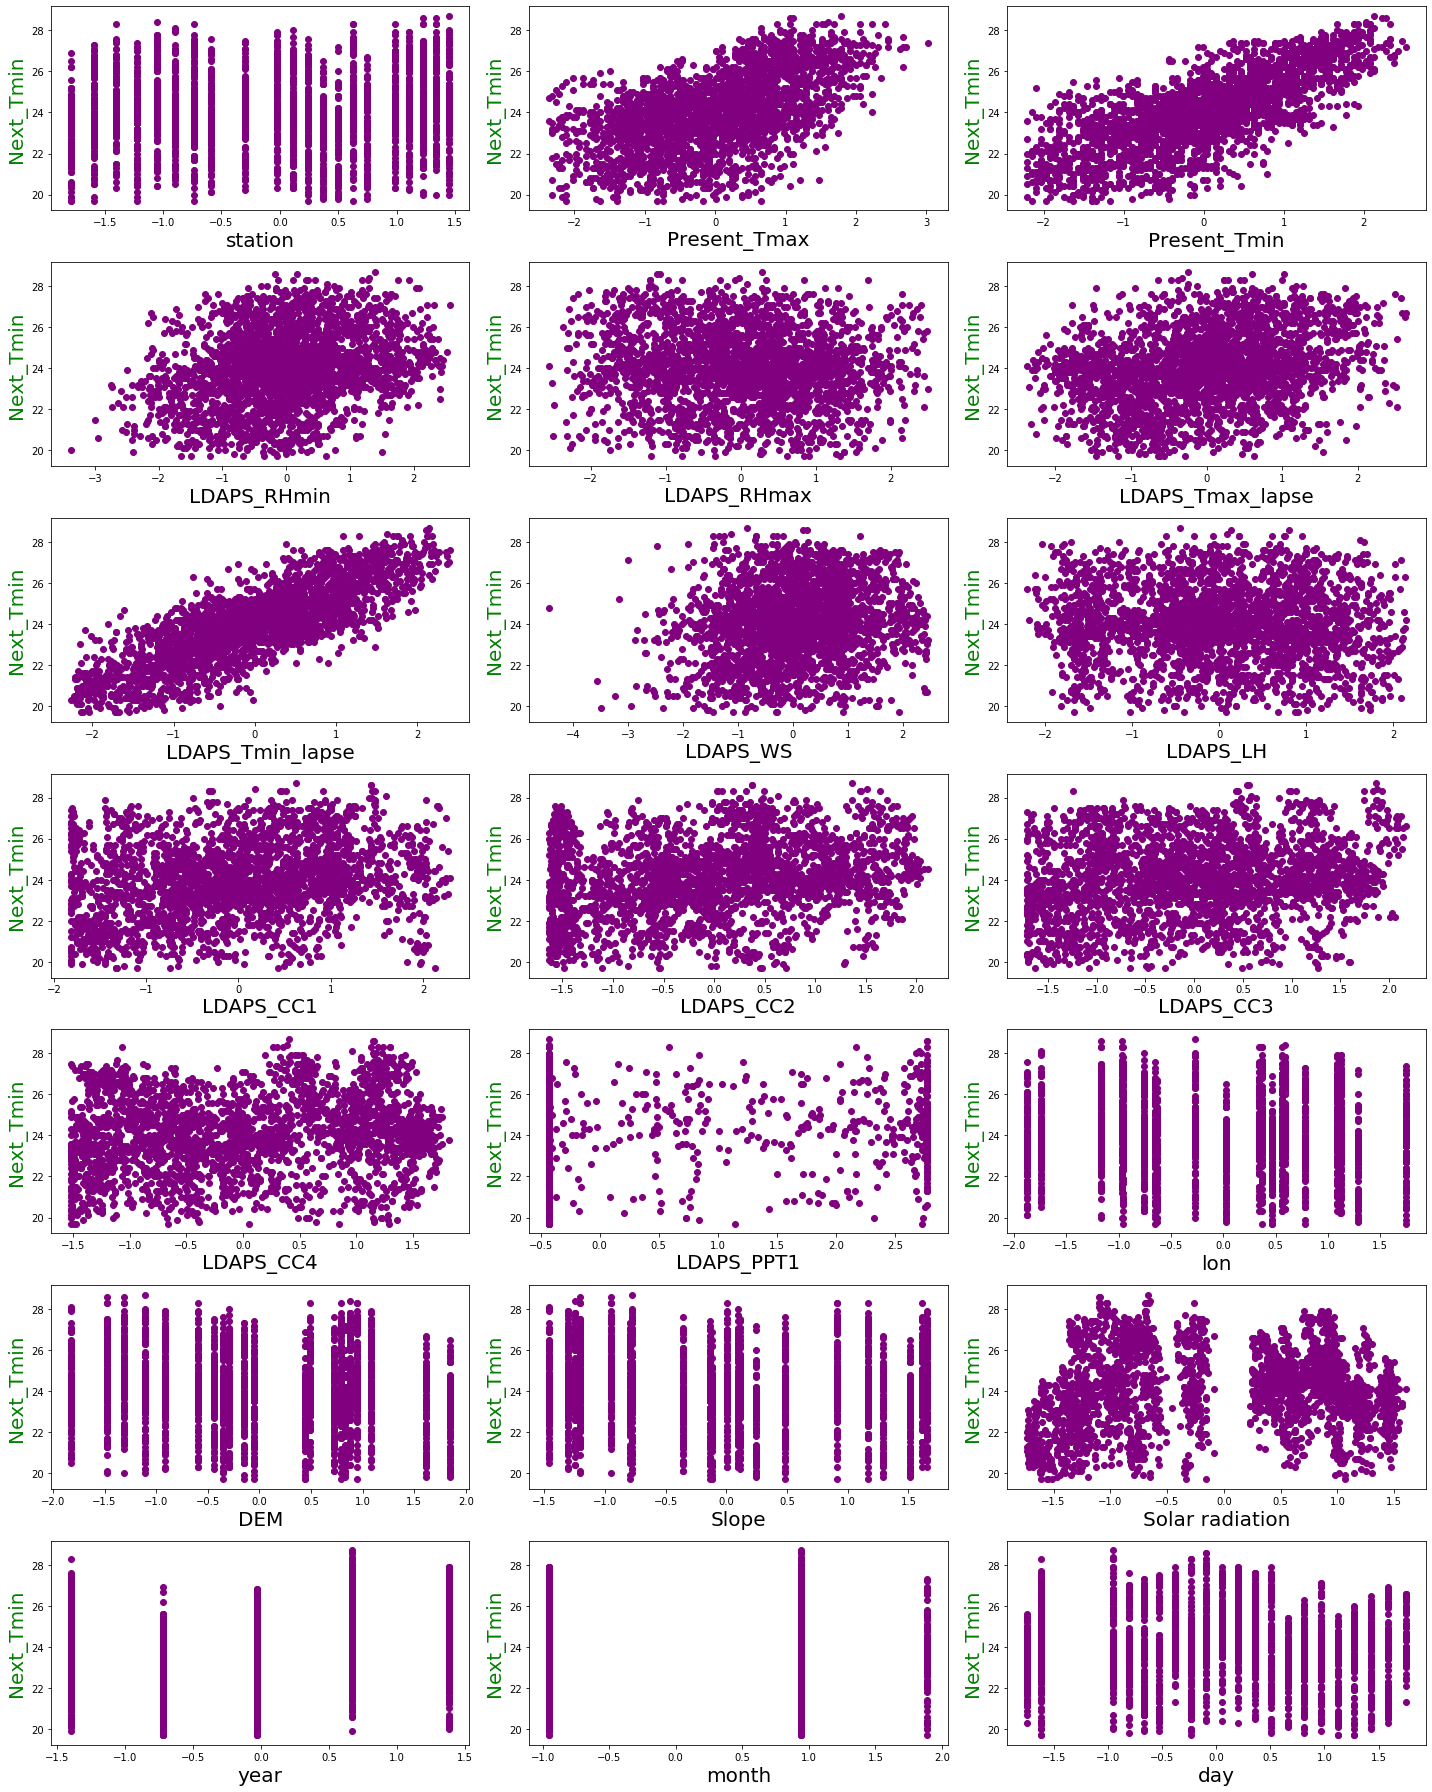

In [214]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 21:
        ax = plt.subplot(7,3,plotnumber)
        plt.scatter(df[column],y2, color ='purple')
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Next_Tmin', fontsize = 20,color='green' )
        
    plotnumber+=1
plt.tight_layout()

In [215]:
##  let's build the model with this random state

x_train, x_test, y_train,y_test = train_test_split(X_scaled,y2,
                                                    test_size=30,
                                                    random_state=100)

Lr = LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [216]:
y_lr_pred = Lr.predict(x_test)

In [217]:
print('*****Accuracy ****\n')
print(metrics.r2_score(y_test,y_lr_pred))

*****Accuracy ****

0.853896475198638


In [218]:
### let's check the mean_absolute_error

MAE = mean_absolute_error(y_test,y_lr_pred)
print(MAE)

0.529303501421014


In [219]:
## Models evaluation using Mean Square Error (MSE)

print('\nThe Mean Square Erro of LinearRegression model is:',mean_squared_error(y_test,y_lr_pred))


The Mean Square Erro of LinearRegression model is: 0.4535199513359076


### The  LinearRegression give Accuracy 0.85% great  also the errors size is not too much ,so let's build more models see which one fit better for our dataset.

In [220]:
### instantiate of the models

dtr = DecisionTreeRegressor(random_state=100)
ada = AdaBoostRegressor(random_state=100)
rid = Ridge(random_state=100)
las = Lasso(random_state=100)
rfr = RandomForestRegressor(random_state=100)

In [221]:
dtr.fit(x_train,y_train)
ada.fit(x_train,y_train)
rid.fit(x_train,y_train)
las.fit(x_train,y_train)
rfr.fit(x_train,y_train)
print('Models are accessfully fitted.!!!')

Models are accessfully fitted.!!!


In [222]:
dt_ypred = dtr.predict(x_test)
ada_ypred = ada.predict(x_test)
rid_ypred = rid.predict(x_test)
las_ypred = las.predict(x_test)
rfr_pred = rfr.predict(x_test)
print('Models are accessfully predicted.!!!')

Models are accessfully predicted.!!!


## __Model Evaluation.__

In [223]:
## Models evaluation using Mean Absolute Erro

dt_mae  = mean_absolute_error(y_test,dt_ypred)
ada_mae = mean_absolute_error(y_test,ada_ypred)
rid_mae = mean_absolute_error(y_test,rid_ypred)
las_mae = mean_absolute_error(y_test,las_ypred)
rfr_mae = mean_absolute_error(y_test,rfr_pred)

print('\n','-'*50)
print('\nThe Mean Absolute Erro of DecisionTreeRegressor model is:',dt_mae )
print('\n','-'*50)
print('\nThe Mean Absolute Erro of AdaBoostRegressor model is:',ada_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of Ridge model is:',rid_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of Lasso model is:',las_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of RandomForestRegressor model is:',rfr_mae)


 --------------------------------------------------

The Mean Absolute Erro of DecisionTreeRegressor model is: 0.86

 --------------------------------------------------

The Mean Absolute Erro of AdaBoostRegressor model is: 0.603539694468166

 --------------------------------------------------

The Mean Absolute Erro of Ridge model is: 0.5292656479428233

 --------------------------------------------------

The Mean Absolute Erro of Lasso model is: 1.0892547572337667

 --------------------------------------------------

The Mean Absolute Erro of RandomForestRegressor model is: 0.4275666666666667


### __From the above verification we can see that RandomForestRegressor model :MAE =0.427 fit better our dataset__

In [226]:
## Models evaluation using Mean Square Error (MSE)

print('\nThe Mean Square Erro of DecisionTreeRegressor model is:',mean_squared_error(y_test,dt_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of AdaBoostRegressor model is:',mean_squared_error(y_test,ada_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of Ridge model is:',mean_squared_error(y_test,rid_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of Lasso model is:',mean_squared_error(y_test,las_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of RandomForestRegressor model is:',mean_squared_error(y_test,rfr_pred))


The Mean Square Erro of DecisionTreeRegressor model is: 1.451333333333334

 --------------------------------------------------

The Mean Square Erro of AdaBoostRegressor model is: 0.5229705017500329

 --------------------------------------------------

The Mean Square Erro of Ridge model is: 0.4535317435159619

 --------------------------------------------------

The Mean Square Erro of Lasso model is: 1.909070593484683

 --------------------------------------------------

The Mean Square Erro of RandomForestRegressor model is: 0.29096350000000015


In [225]:
### checking the accuray of each models.

print('*****Accuracy of DecisionTreeRegressor model is: ****\n')
print(metrics.r2_score(y_test,dt_ypred))
print('\n','-'*50)
print('*****Accuracy of AdaBoostRegressor model is: ****\n')
print(metrics.r2_score(y_test,ada_ypred))
print('\n','-'*50)
print('*****Accuracy of Ridge model is: ****\n')
print(metrics.r2_score(y_test,rid_ypred))
print('\n','-'*50)
print('*****Accuracy of Lasso model is: ****\n')
print(metrics.r2_score(y_test,las_ypred))
print('\n','-'*50)
print('*****Accuracy of RandomForestRegressor model is: ****\n')
print(metrics.r2_score(y_test,rfr_pred))
print('\n','-'*50)

*****Accuracy of DecisionTreeRegressor model is: ****

0.53244633441792

 --------------------------------------------------
*****Accuracy of AdaBoostRegressor model is: ****

0.8315226630102016

 --------------------------------------------------
*****Accuracy of Ridge model is: ****

0.853892676293946

 --------------------------------------------------
*****Accuracy of Lasso model is: ****

0.3849841843095636

 --------------------------------------------------
*****Accuracy of RandomForestRegressor model is: ****

0.9062647788408877

 --------------------------------------------------


### __From all verification , we can conclude that RandomForestRegressor(rfr) model is our best model since it has the less errors(MAE, MSE) and also has the higest accuracy = r2_score = 90%__

Text(0.5, 1.0, 'Actual VS Predicted')

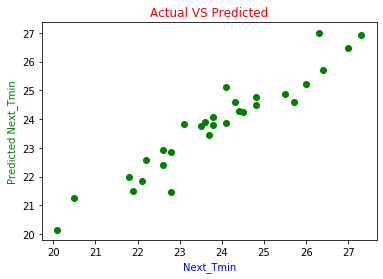

In [238]:
### let's plot the actual value and the predicted values and check how it look

plt.scatter(y_test,rfr_pred,color ='green')
plt.xlabel('Next_Tmin',color='blue')
plt.ylabel('Predicted Next_Tmin',color='green')
plt.title('Actual VS Predicted',color='r')

### __From above scatter plot we can say that our best model draw a great linear relationshipe with the dataset.__

## __Hyper parameter Tuning (HPT)__

In [239]:
### importing the libraries
from sklearn.model_selection import GridSearchCV

In [240]:
grid_param1 = {
    'criterion':['mse', 'mae'],
    'max_depth':range(2,10,3),
    'min_samples_leaf':range(1,10,2),
    'min_samples_split':range(2,10,2),
    'max_features':["auto", "sqrt", "log2"]
    }

In [242]:
grid_search1 = GridSearchCV(estimator=rfr,
                         param_grid=grid_param1,
                         cv=5,n_jobs=-1)

In [243]:
## again train the model.

grid_search1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=100), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 10, 3),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [244]:
# best parameters

best_parameters = grid_search1.best_params_
print(best_parameters)

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


### Now got the best paramters and let's build again the model.

In [245]:
## so let's build again the decisionTreeRegressor model

rfr_model1 = RandomForestRegressor(criterion='mse',
                            max_depth=8,
                            max_features= 'sqrt',
                            min_samples_leaf=1,
                            min_samples_split=2,
                            random_state=100)

In [246]:
## let's fit gain the model with the data

rfr_model1.fit(x_train,y_train)
pred_drfr = rfr_model1.predict(x_test)

print("\n=============Test Result==============")

print(f"Post Accuracy :{metrics.r2_score(y_test,pred_drfr)*100:.2f}%")
print("_____________________________________________")


=============Test Result==============
Post Accuracy :91.88%
_____________________________________________


### __Great we are getting good a Accuracy , from 90% to 91.88% Accurarcy.!!!__

## __Conclusion: our best model is RandomForestRegressor(rfr_model1) with accuracy = 91.88%.__

### __Model Saving__

In [247]:
import joblib

In [249]:
joblib.dump(rfr_model1,'Next_Tmin_Prediction_Model.pkl')

['Next_Tmin_Prediction_Model.pkl']

In [250]:
print("@"*60)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


# __END OF THE PROJECT, THANK YOU!__